# APS1070 Hongjian Zhu 1004291857

#### Project 1 --- Basic Principles and Models 
**Deadline: Jun 4, 11PM - 10 percent**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Name: _Hongjian Zhu__  *(here and elsewhere, please replace the underscore with your answer)*

Student ID: _1004291857_

##**Marking Scheme:**

This project is worth **10 percent** of your final grade.

Draw a plot or table where necessary to summarize your findings. 

**Practice Vectorized coding**: If you need to write a loop in your solution, think about how you can implement the same functionality with vectorized operations. Try to avoid loops as much as possible (in some cases, loops are inevitable).




### How to submit **(HTML + IPYNB)**

1. Download your notebook: `File -> Download .ipynb`

2. Click on the Files icon on the far left menu of Colab

3. Select & upload your `.ipynb` file you just downloaded, and then obtain its path (right click) (you might need to hit the Refresh button before your file shows up)


4. execute the following in a Colab cell:
```
%%shell
jupyter nbconvert --to html /PATH/TO/YOUR/NOTEBOOKFILE.ipynb
```

5. An HTML version of your notebook will appear in the files, so you can download it.

6. Submit **both** <font color='red'>`HTML` and `IPYNB`</font>  files on Quercus for grading.



Ref: https://stackoverflow.com/a/64487858 



# Project 1 [10 Marks] 
Let's apply the tools we have learned in Tutorial 1 to a new dataset.

We're going to work with a breast cancer dataset. Download it using the cell below:

In [ ]:
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()

In [ ]:
import pandas as pd
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['target'] = dataset['target']

In [ ]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
len(df[df['mean area']>700])

171

In [ ]:
li_target = ['M' if ix==0 else 'B' for ix in list(dataset.target)]
print(pd.Series(li_target).value_counts())

B    357
M    212
dtype: int64


## Part 1: Getting started [2 Marks]
First off, take a look at the `data`, `target` and `feature_names` entries in the `dataset` dictionary. They contain the information we'll be working with here. Then, create a Pandas DataFrame called `df` containing the data and the targets with the feature names as column headings. If you need help, see [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) for more details on how to achieve this. **[0.4]**
* How many features do we have in this dataset? *30 Features*
* How many observations have a 'mean area' of greater than 700? _171_
* How many participants tested `Malignant`? 212
* How many participants tested `Benign`? 357


### Splitting the data
It is best practice to have a training set (from which there is a rotating validation subset) and a test set. Our aim here is to (eventually) obtain the best accuracy we can on the test set (we'll do all our tuning on the training/validation sets, however.) 

**Split the dataset** into a train and a test set **"70:30"**, use **``random_state=0``**. The test set is set aside (untouched) for final evaluation, once hyperparameter optimization is complete. **[0.5]**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(dataset.data, dataset.target,test_size = 0.3, random_state = 0)

### Effect of Standardization (Visual)
Use `seaborn.lmplot` ([help here](https://seaborn.pydata.org/generated/seaborn.lmplot.html)) to visualize a few features of the training set. Draw a plot where the x-axis is ``worst smoothness``, the y-axis is ``worst fractal dimension,`` and the color of each datapoint indicates its class.  **[0.5]**

Standardizing the data is often critical in machine learning. Show a plot as above, but with two features with very different scales. Standardize the data and plot those features again. What's different? Based on your observation, what is the advantage of standardization? **[0.6]**




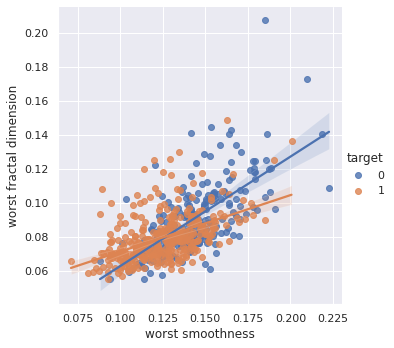

In [ ]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler

#set the sns property
sns.set()

#standardize two columns
df_x = df[['worst smoothness','worst fractal dimension']]
df[['s worst smoothness','s worst fractal dimension']] = (df_x-df_x.mean())/(df_x.std())

g=sns.lmplot(x="worst smoothness",y="worst fractal dimension",hue="target",data=df)

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(df[['worst smoothness','worst fractal dimension']])

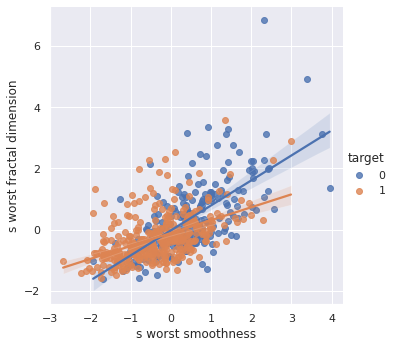

In [ ]:
g2=sns.lmplot(x="s worst smoothness",y="s worst fractal dimension",hue="target",data=df)

**Answer**:

If features are not been standaralized, which as shown in the first plot, larger feature values will have greater influence to the model. Whereas, with standarlization, each feature will have same contribution to the model.  

## Part 2: KNN Classifier without Standardization [2 Marks]
Normally, standardizing data is a key step in preparing data for a KNN classifier. However, for educational purposes, let's first try to build a model without standardization. Let's create a KNN classifier to predict whether a patient has a malignant or benign tumor. 

Follow these steps: 

1.   Train a KNN Classifier using cross-validation on the dataset. Sweep `k` (number of neighbours) from 1 to 100, and show a plot of the mean cross-validation accuracy vs `k`. **[1]**
2.   What is the best `k`? What is the highest cross-validation accuracy? **[0.5]**
3. Comment on  which ranges of `k` lead to underfitted or overfitted models (hint: compare training and validation curves!). **[0.5]**




In [ ]:
from sklearn import neighbors
import numpy as np
from sklearn.model_selection import cross_validate

accuracy_train, accuracy_test = [],[]
for ix in range(1,101):
  knn = neighbors.KNeighborsClassifier(n_neighbors=ix)
  score = cross_validate(knn,X_train, Y_train, cv=5, return_train_score = True)
  accuracy_train.append(score['train_score'].mean())
  accuracy_test.append(score['test_score'].mean())

best_accuracy = 0
for ix,va in enumerate(accuracy_test):
  if(va>best_accuracy):
    best_accuracy = va
    best_k = ix+1
  print("k= ",ix+1, "Mean train accuracy: ",round(accuracy_train[ix],3), " Mean test accuracy: ", round(va,3))
print("\n******************************")
print('Answer for Section Part2.2 :\n')
print('best k=',best_k,'best accuracy:',best_accuracy)
print("******************************\n")

k=  1 Mean train accuracy:  1.0  Mean test accuracy:  0.917
k=  2 Mean train accuracy:  0.963  Mean test accuracy:  0.917
k=  3 Mean train accuracy:  0.95  Mean test accuracy:  0.927
k=  4 Mean train accuracy:  0.943  Mean test accuracy:  0.927
k=  5 Mean train accuracy:  0.937  Mean test accuracy:  0.92
k=  6 Mean train accuracy:  0.938  Mean test accuracy:  0.925
k=  7 Mean train accuracy:  0.937  Mean test accuracy:  0.932
k=  8 Mean train accuracy:  0.937  Mean test accuracy:  0.932
k=  9 Mean train accuracy:  0.932  Mean test accuracy:  0.925
k=  10 Mean train accuracy:  0.934  Mean test accuracy:  0.935
k=  11 Mean train accuracy:  0.93  Mean test accuracy:  0.935
k=  12 Mean train accuracy:  0.932  Mean test accuracy:  0.932
k=  13 Mean train accuracy:  0.93  Mean test accuracy:  0.922
k=  14 Mean train accuracy:  0.932  Mean test accuracy:  0.93
k=  15 Mean train accuracy:  0.927  Mean test accuracy:  0.922
k=  16 Mean train accuracy:  0.928  Mean test accuracy:  0.925
k=  17 M

Text(0.5, 1.0, 'mean cross-validation accuracy vs k')

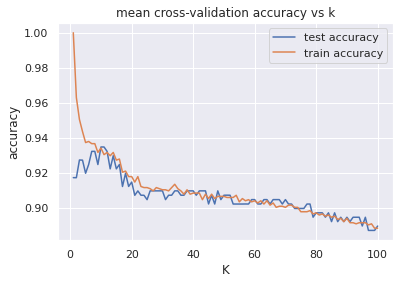

In [ ]:
import matplotlib.pyplot as plt
x_axis = np.linspace(1,100,100)
plt.plot(x_axis,accuracy_test, label='test accuracy')
plt.plot(x_axis,accuracy_train, label='train accuracy')
plt.legend()
plt.xlabel("K")
plt.ylabel("accuracy")
plt.title('mean cross-validation accuracy vs k')

**Answer Part 2.3:**

Based on the plot, when k is less than 9, the mean train result is good, but the mean test result is not as good as the train result, which indicates overfitting happens. Meanwhile, when k is greater than 17, both the mean train error and test error are large, the model is underfitted. 

## Part 3: Feature Selection [3 Marks]
In this part, we aim to investigate the importance of each feature on the final classification accuracy. 
If we want to try every possible combination of features, we would have to test  $2^F$ different cases,  where F is the number of features, and in each case, we have to do a hyperparameter search (finding K, in KNN using cross-validation). That will take days!. 

To find more important features we will use a decision tree. based on a decision tree we can compute feature importance that is a metric for our feature selection (code is provided below).

You can use [this link](https://machinelearningmastery.com/calculate-feature-importance-with-python/
) to get familiar with extracting the feature impotance order of machine learning algorithms in Python.

After we identified and removed the least important feature and evaluated a new KNN model on the new set of features, if the stop conditions (see step 7 below) are not met, we need to repeat the process and remove another feature.


Design a function ( `Feature_selector`) that accepts your dataset (X_train , y_train) and a threshold as inputs and: **[1]**
1. Fits a decision tree classifier on the training set.

2. Extracts the feature importance order of the decision tree model.

3. Removes the least important feature based on step 2. 
4. Then, a KNN model is trained on the remaining features. The number of neighbors (`k`) for each KNN model should be tuned using a 5-fold cross-validation.
5. Store the best `mean cross-validation` score, the corresponding `k` (number of neighbours) value, and the removed feature in three lists.
6. Repeat Steps 3-5 until you meet the stop condition (step 7). 
 
7. We will stop this process when (1) there is only one feature left, or (2) our cross-validation accuracy is dropped significantly compared to a model that uses all the features. In this function, we accept a threshold as an input argument. For example, if threshold=0.95 we do not continue removing features if our mean cross-validation accuracy after tuning `k` is bellow **0.95 $\times$ Full Feature cross-validation accuracy**.

8. Your function returns the list of removed features, the list of corresponding mean cross-validation accuracies, and the list of `k` values when a feature was removed (i.e., the lists that were appended to in Step 5).

* Visualize your results by plotting the best mean cross-validation accuracy (based on the best value of `k`) on y axis vs. the number of features (x axis). This plot describes: what is the best cv score with 1 feature, 2 features, 3 features ... and all the features. **[0.5]**

* Plot the best value of `k` (y-axis) vs. the number of features. This plot explains the trend of number of neighbours with respect to the number of features.  **[0.5]**

* State what is the number of essential features for classification and justify your answer. **[1]**
  
  







 

You can use the following piece of code to start training a decision tree classifier and obtain its feature importance order. 
```
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(X_train,y_train)
importance = dt.feature_importances_
```


In [ ]:
def KnnClassifier(X_train, Y_train):
  #print("\n",X_train.shape)
  accuracy_train, accuracy_test = [],[]
  for ix in range(1,101):
    knn = neighbors.KNeighborsClassifier(n_neighbors=ix)
    score = cross_validate(knn,X_train, Y_train, cv=5, return_train_score = True)
    accuracy_train.append(score['train_score'].mean())
    accuracy_test.append(score['test_score'].mean())
  acc_train = np.asarray(accuracy_train)
  acc_test = np.asarray(accuracy_test)
  print("test accuracy: ",acc_test)
  bestK = int(np.argmax(acc_test))
  best_test_accuracy = acc_test[bestK]
  best_train_accuracy = acc_train[bestK]
  bestK = bestK+1
  print('\nbest K: ',bestK,"accuracy at training: ",round(best_train_accuracy,4), "accuracy at testing: ",round(best_test_accuracy,4))
  return bestK,best_train_accuracy,best_test_accuracy


In [ ]:
def Feature_selector (X_train , Y_train , tr=0.95):
  DF = pd.DataFrame(data = X_train, columns = dataset.feature_names)
  bestk, standard_train_a, standard_test_a = KnnClassifier(DF, Y_train)

  ix = 0
  record = {}
  Features = dataset.feature_names
  DroppedFeatures = []
  #print(Features)
  dt = tree.DecisionTreeClassifier()
  flag = True

  while(flag):
    dt.fit(DF, Y_train)
    importance = dt.feature_importances_
    s = pd.Series(importance) #list of importance

    axis = np.array(range(0,DF.shape[1]))
    plt.bar(axis, importance)
    if(ix > 23):
      plt.xticks(axis,Features,rotation ='vertical')
    plt.ylabel('Importance')
    plt.xlabel('Features')
    plt.title('Importance Vs. Features')
    plt.show()

    Index2drop = s.idxmin()# get the least importance column
    print('\n-------------------------------')
    print('Delete feature: ',Features[Index2drop])
    DroppedFeatures.append(Features[Index2drop]) #features that with the least importance will be removed from the model

    DF.drop(Features[Index2drop],axis=1, inplace=True) #drop the least importance feature 
    
    Features = np.delete(Features, Index2drop) # delete the feature 

    bk, b_train_a, b_test_a = KnnClassifier(DF, Y_train) #simulate the best k and best accuracy

    print('best accuracy',b_test_a,'at k= ',bk)
    record[ix]=[Features,bk,b_train_a,b_test_a]
    ix += 1

    if(b_test_a< tr*standard_test_a or DF.shape[1]==1):
      flag = False

  return DroppedFeatures,record

test accuracy:  [0.91712025 0.91708861 0.92721519 0.92712025 0.91962025 0.9246519
 0.9321519  0.9321519  0.92462025 0.9346519  0.9346519  0.93212025
 0.9221519  0.92968354 0.9221519  0.92462025 0.91205696 0.91958861
 0.91208861 0.91458861 0.90702532 0.90952532 0.90705696 0.90702532
 0.90452532 0.90955696 0.90955696 0.90955696 0.90955696 0.90955696
 0.90455696 0.90705696 0.90705696 0.90955696 0.90955696 0.90705696
 0.90705696 0.90955696 0.90955696 0.90955696 0.90705696 0.90955696
 0.90955696 0.90955696 0.90205696 0.90705696 0.90202532 0.90955696
 0.90455696 0.90705696 0.90708861 0.90705696 0.90202532 0.90202532
 0.90202532 0.90202532 0.90205696 0.90202532 0.90455696 0.90455696
 0.90205696 0.90202532 0.90455696 0.90455696 0.90202532 0.90455696
 0.90455696 0.90455696 0.90202532 0.90455696 0.90202532 0.90202532
 0.89949367 0.89949367 0.89949367 0.89949367 0.90202532 0.90202532
 0.89449367 0.89699367 0.89699367 0.89699367 0.89449367 0.89699367
 0.89196203 0.89699367 0.89196203 0.89446203 0.

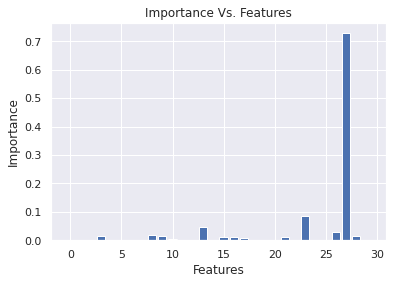


-------------------------------
Delete feature:  mean radius
test accuracy:  [0.91712025 0.91708861 0.92721519 0.92712025 0.91962025 0.9246519
 0.9321519  0.9321519  0.92462025 0.9346519  0.9346519  0.93212025
 0.9221519  0.92968354 0.9221519  0.92462025 0.91205696 0.91958861
 0.91208861 0.91458861 0.90702532 0.90952532 0.90705696 0.90702532
 0.90452532 0.90955696 0.90955696 0.90955696 0.90955696 0.90955696
 0.90455696 0.90705696 0.90705696 0.90955696 0.90955696 0.90705696
 0.90705696 0.90955696 0.90955696 0.90955696 0.90705696 0.90955696
 0.90955696 0.90955696 0.90205696 0.90705696 0.90202532 0.90955696
 0.90455696 0.90705696 0.90708861 0.90705696 0.90202532 0.90202532
 0.90202532 0.90202532 0.90205696 0.90202532 0.90455696 0.90455696
 0.90205696 0.90202532 0.90455696 0.90455696 0.90202532 0.90455696
 0.90455696 0.90455696 0.90202532 0.90455696 0.90202532 0.90202532
 0.89949367 0.89949367 0.89949367 0.89949367 0.90202532 0.90202532
 0.89449367 0.89699367 0.89699367 0.89699367 0.89449

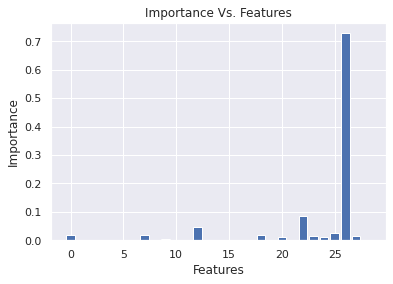


-------------------------------
Delete feature:  mean perimeter
test accuracy:  [0.91712025 0.91708861 0.92468354 0.92712025 0.91962025 0.9246519
 0.9321519  0.9321519  0.92462025 0.93212025 0.9346519  0.93212025
 0.9221519  0.92968354 0.9221519  0.92212025 0.91205696 0.91958861
 0.91208861 0.91458861 0.90702532 0.90952532 0.90705696 0.90952532
 0.90452532 0.90955696 0.90955696 0.90955696 0.90955696 0.90955696
 0.90455696 0.90705696 0.90705696 0.90955696 0.90955696 0.90705696
 0.90705696 0.90955696 0.90955696 0.90955696 0.90955696 0.90955696
 0.90955696 0.90955696 0.90205696 0.90705696 0.90202532 0.90955696
 0.90455696 0.90705696 0.90708861 0.90705696 0.90202532 0.90202532
 0.90202532 0.90202532 0.90205696 0.90202532 0.90455696 0.90455696
 0.90205696 0.90202532 0.90455696 0.90455696 0.90202532 0.90455696
 0.90455696 0.90455696 0.90202532 0.90455696 0.90202532 0.90202532
 0.89949367 0.89949367 0.89949367 0.89949367 0.90202532 0.90202532
 0.89449367 0.89699367 0.89699367 0.89699367 0.89

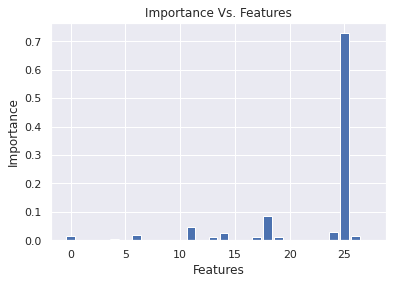


-------------------------------
Delete feature:  mean area
test accuracy:  [0.87427215 0.87936709 0.88696203 0.89939873 0.90189873 0.89186709
 0.89433544 0.89439873 0.89689873 0.89439873 0.89443038 0.89189873
 0.89946203 0.90196203 0.90196203 0.90199367 0.90702532 0.89693038
 0.90705696 0.90702532 0.90705696 0.91205696 0.90705696 0.90702532
 0.90702532 0.90952532 0.90955696 0.91205696 0.90955696 0.90702532
 0.90702532 0.90955696 0.91208861 0.91458861 0.90955696 0.90955696
 0.90955696 0.90955696 0.90955696 0.90955696 0.90955696 0.90702532
 0.90955696 0.90955696 0.90955696 0.91205696 0.91205696 0.91205696
 0.90955696 0.90702532 0.90452532 0.90452532 0.90452532 0.90702532
 0.90702532 0.90702532 0.90702532 0.90952532 0.91205696 0.90702532
 0.91455696 0.91205696 0.91205696 0.91455696 0.90705696 0.91205696
 0.90955696 0.90955696 0.90708861 0.90958861 0.90458861 0.90708861
 0.90708861 0.90458861 0.89952532 0.89952532 0.90199367 0.90199367
 0.90199367 0.90199367 0.90452532 0.90452532 0.902025

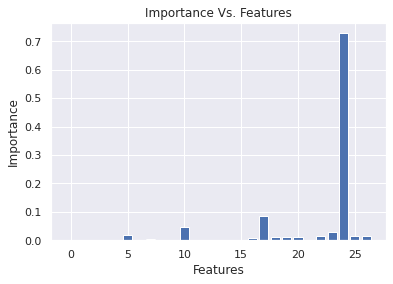


-------------------------------
Delete feature:  mean texture
test accuracy:  [0.87427215 0.87183544 0.88443038 0.89686709 0.89936709 0.88933544
 0.8868038  0.89439873 0.89439873 0.89186709 0.90193038 0.89693038
 0.89696203 0.89943038 0.89943038 0.90449367 0.90452532 0.89943038
 0.90705696 0.90702532 0.90705696 0.91205696 0.90705696 0.90449367
 0.90702532 0.90702532 0.90955696 0.91205696 0.90955696 0.90702532
 0.90702532 0.90955696 0.91208861 0.91458861 0.90955696 0.90955696
 0.90955696 0.90955696 0.90955696 0.90955696 0.90955696 0.90702532
 0.90955696 0.90955696 0.90955696 0.91205696 0.91205696 0.91205696
 0.90955696 0.90702532 0.90452532 0.90452532 0.90452532 0.90702532
 0.90702532 0.90702532 0.90702532 0.90952532 0.91205696 0.90702532
 0.91455696 0.91205696 0.91205696 0.91455696 0.90705696 0.91205696
 0.90705696 0.90955696 0.90708861 0.90958861 0.90458861 0.90708861
 0.90708861 0.90458861 0.89952532 0.89952532 0.90199367 0.90199367
 0.90199367 0.90199367 0.90452532 0.90199367 0.902

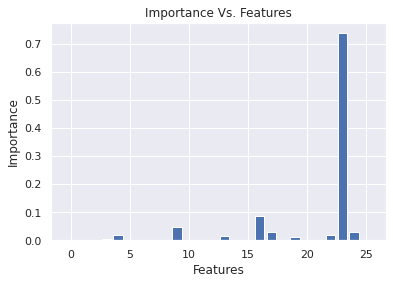


-------------------------------
Delete feature:  mean smoothness
test accuracy:  [0.87427215 0.87183544 0.88443038 0.89686709 0.89936709 0.88933544
 0.8868038  0.89439873 0.89439873 0.89186709 0.90193038 0.89693038
 0.89696203 0.89943038 0.89943038 0.90449367 0.90452532 0.89943038
 0.90705696 0.90702532 0.90705696 0.91205696 0.90705696 0.90449367
 0.90702532 0.90702532 0.90955696 0.91205696 0.90955696 0.90702532
 0.90702532 0.90955696 0.91208861 0.91458861 0.90955696 0.90955696
 0.90955696 0.90955696 0.90955696 0.90955696 0.90955696 0.90702532
 0.90955696 0.90955696 0.90955696 0.91205696 0.91205696 0.91205696
 0.90955696 0.90702532 0.90452532 0.90452532 0.90452532 0.90702532
 0.90702532 0.90702532 0.90702532 0.90952532 0.91205696 0.90702532
 0.91455696 0.91205696 0.91205696 0.91455696 0.90705696 0.91205696
 0.90705696 0.90955696 0.90708861 0.90958861 0.90458861 0.90708861
 0.90708861 0.90458861 0.89952532 0.89952532 0.90199367 0.90199367
 0.90199367 0.90199367 0.90452532 0.90199367 0.

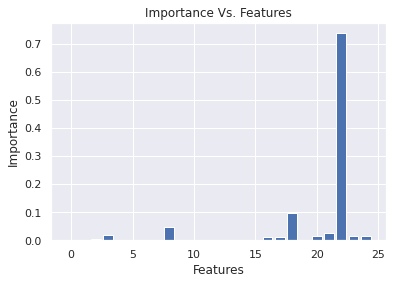


-------------------------------
Delete feature:  mean compactness
test accuracy:  [0.87427215 0.87183544 0.88443038 0.89686709 0.89936709 0.88933544
 0.8868038  0.89439873 0.89439873 0.89186709 0.90193038 0.89693038
 0.89696203 0.89943038 0.89943038 0.90449367 0.90452532 0.89943038
 0.90705696 0.90702532 0.90705696 0.91205696 0.90705696 0.90449367
 0.90702532 0.90702532 0.90955696 0.91205696 0.90955696 0.90702532
 0.90702532 0.90955696 0.91208861 0.91458861 0.90955696 0.90955696
 0.90955696 0.90955696 0.90955696 0.90955696 0.90955696 0.90702532
 0.90955696 0.90955696 0.90955696 0.91205696 0.91205696 0.91205696
 0.90955696 0.90702532 0.90452532 0.90452532 0.90452532 0.90702532
 0.90702532 0.90702532 0.90702532 0.90952532 0.91205696 0.90702532
 0.91455696 0.91205696 0.91205696 0.91455696 0.90705696 0.91205696
 0.90705696 0.90955696 0.90708861 0.90958861 0.90458861 0.90708861
 0.90708861 0.90458861 0.89952532 0.89952532 0.90199367 0.90199367
 0.90199367 0.90199367 0.90452532 0.90199367 0

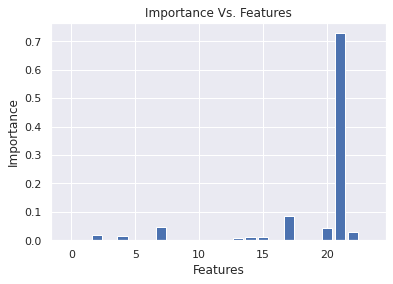


-------------------------------
Delete feature:  mean concavity
test accuracy:  [0.87427215 0.87183544 0.88443038 0.89686709 0.89936709 0.88933544
 0.8868038  0.89439873 0.89439873 0.89186709 0.90193038 0.89693038
 0.89696203 0.89943038 0.89943038 0.90449367 0.90452532 0.89943038
 0.90705696 0.90702532 0.90705696 0.91205696 0.90705696 0.90449367
 0.90702532 0.90702532 0.90955696 0.91205696 0.90955696 0.90702532
 0.90702532 0.90955696 0.91208861 0.91458861 0.90955696 0.90955696
 0.90955696 0.90955696 0.90955696 0.90955696 0.90955696 0.90702532
 0.90955696 0.90955696 0.90955696 0.91205696 0.91205696 0.91205696
 0.90955696 0.90702532 0.90452532 0.90452532 0.90452532 0.90702532
 0.90702532 0.90702532 0.90702532 0.90952532 0.91205696 0.90702532
 0.91455696 0.91205696 0.91205696 0.91455696 0.90705696 0.91205696
 0.90705696 0.90955696 0.90708861 0.90958861 0.90458861 0.90708861
 0.90708861 0.90458861 0.89952532 0.89952532 0.90199367 0.90199367
 0.90199367 0.90199367 0.90452532 0.90199367 0.9

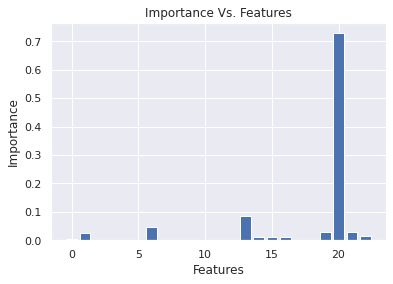


-------------------------------
Delete feature:  mean fractal dimension
test accuracy:  [0.87427215 0.87183544 0.88443038 0.89686709 0.89936709 0.88933544
 0.8868038  0.89439873 0.89439873 0.89186709 0.90193038 0.89693038
 0.89696203 0.89943038 0.89943038 0.90449367 0.90452532 0.89943038
 0.90705696 0.90702532 0.90705696 0.91205696 0.90705696 0.90449367
 0.90702532 0.90702532 0.90955696 0.91205696 0.90955696 0.90702532
 0.90702532 0.90955696 0.91208861 0.91458861 0.90955696 0.90955696
 0.90955696 0.90955696 0.90955696 0.90955696 0.90955696 0.90702532
 0.90955696 0.90955696 0.90955696 0.91205696 0.91205696 0.91205696
 0.90955696 0.90702532 0.90452532 0.90452532 0.90452532 0.90702532
 0.90702532 0.90702532 0.90702532 0.90952532 0.91205696 0.90702532
 0.91455696 0.91205696 0.91205696 0.91455696 0.90705696 0.91205696
 0.90705696 0.90955696 0.90708861 0.90958861 0.90458861 0.90708861
 0.90708861 0.90458861 0.89952532 0.89952532 0.90199367 0.90199367
 0.90199367 0.90199367 0.90452532 0.9019

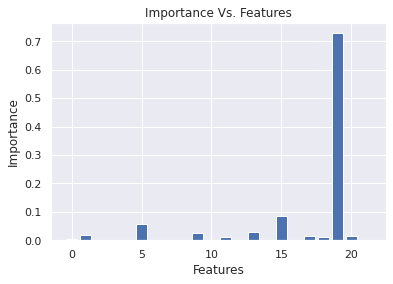


-------------------------------
Delete feature:  radius error
test accuracy:  [0.87427215 0.87183544 0.88443038 0.89686709 0.89936709 0.88933544
 0.8868038  0.89439873 0.89439873 0.89186709 0.90193038 0.89693038
 0.89696203 0.89943038 0.89943038 0.90449367 0.90452532 0.89943038
 0.90705696 0.90702532 0.90705696 0.91205696 0.90705696 0.90449367
 0.90702532 0.90702532 0.90955696 0.91205696 0.90955696 0.90702532
 0.90702532 0.90955696 0.91208861 0.91458861 0.90955696 0.90955696
 0.90955696 0.90955696 0.90955696 0.90955696 0.90955696 0.90702532
 0.90955696 0.90955696 0.90955696 0.91205696 0.91205696 0.91205696
 0.90955696 0.90702532 0.90452532 0.90452532 0.90452532 0.90702532
 0.90702532 0.90702532 0.90702532 0.90952532 0.91205696 0.90702532
 0.91455696 0.91205696 0.91205696 0.91455696 0.90705696 0.91205696
 0.90705696 0.90955696 0.90708861 0.90958861 0.90458861 0.90708861
 0.90708861 0.90458861 0.89952532 0.89952532 0.90199367 0.90199367
 0.90199367 0.90199367 0.90452532 0.90199367 0.902

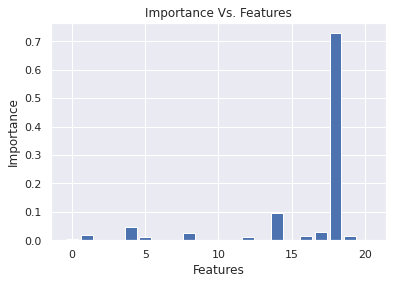


-------------------------------
Delete feature:  texture error
test accuracy:  [0.87427215 0.87183544 0.88443038 0.89686709 0.89936709 0.88933544
 0.8868038  0.89439873 0.89439873 0.89186709 0.90193038 0.89693038
 0.89696203 0.89943038 0.89943038 0.90449367 0.90452532 0.89943038
 0.90705696 0.90702532 0.90705696 0.91205696 0.90705696 0.90449367
 0.90702532 0.90702532 0.90955696 0.91205696 0.90955696 0.90702532
 0.90702532 0.90955696 0.91208861 0.91458861 0.90955696 0.90955696
 0.90955696 0.90955696 0.90955696 0.90955696 0.90955696 0.90702532
 0.90955696 0.90955696 0.90955696 0.91205696 0.91205696 0.91205696
 0.90955696 0.90702532 0.90452532 0.90452532 0.90452532 0.90702532
 0.90702532 0.90702532 0.90702532 0.90952532 0.91205696 0.90702532
 0.91455696 0.91205696 0.91205696 0.91455696 0.90705696 0.91205696
 0.90705696 0.90955696 0.90708861 0.90958861 0.90458861 0.90708861
 0.90708861 0.90458861 0.89952532 0.89952532 0.90199367 0.90199367
 0.90199367 0.90199367 0.90452532 0.90199367 0.90

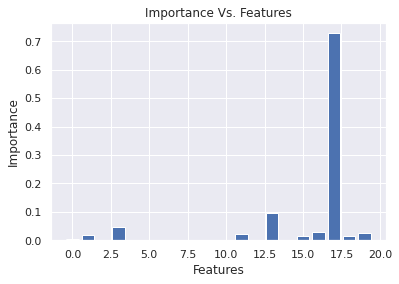


-------------------------------
Delete feature:  perimeter error
test accuracy:  [0.87427215 0.87183544 0.88443038 0.89686709 0.89936709 0.88933544
 0.8868038  0.89439873 0.89439873 0.89186709 0.90193038 0.89693038
 0.89696203 0.89943038 0.89943038 0.90449367 0.90452532 0.89943038
 0.90705696 0.90702532 0.90705696 0.91205696 0.90705696 0.90449367
 0.90702532 0.90702532 0.90955696 0.91205696 0.90955696 0.90702532
 0.90702532 0.90955696 0.91208861 0.91458861 0.90955696 0.90955696
 0.90955696 0.90955696 0.90955696 0.90955696 0.90955696 0.90702532
 0.90955696 0.90955696 0.90955696 0.91205696 0.91205696 0.91205696
 0.90955696 0.90702532 0.90452532 0.90452532 0.90452532 0.90702532
 0.90702532 0.90702532 0.90702532 0.90952532 0.91205696 0.90702532
 0.91455696 0.91205696 0.91205696 0.91455696 0.90705696 0.91205696
 0.90705696 0.90955696 0.90708861 0.90958861 0.90458861 0.90708861
 0.90708861 0.90458861 0.89952532 0.89952532 0.90199367 0.90199367
 0.90199367 0.90199367 0.90452532 0.90199367 0.

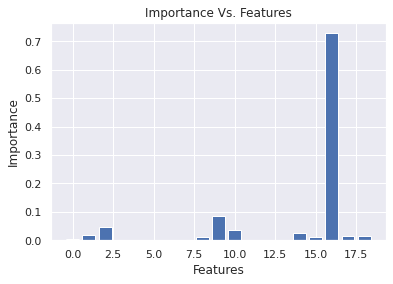


-------------------------------
Delete feature:  compactness error
test accuracy:  [0.87427215 0.87183544 0.88443038 0.89686709 0.89936709 0.88933544
 0.8868038  0.89439873 0.89439873 0.89186709 0.90193038 0.89693038
 0.89696203 0.89943038 0.89943038 0.90449367 0.90452532 0.89943038
 0.90705696 0.90702532 0.90705696 0.91205696 0.90705696 0.90449367
 0.90702532 0.90702532 0.90955696 0.91205696 0.90955696 0.90702532
 0.90702532 0.90955696 0.91208861 0.91458861 0.90955696 0.90955696
 0.90955696 0.90955696 0.90955696 0.90955696 0.90955696 0.90702532
 0.90955696 0.90955696 0.90955696 0.91205696 0.91205696 0.91205696
 0.90955696 0.90702532 0.90452532 0.90452532 0.90452532 0.90702532
 0.90702532 0.90702532 0.90702532 0.90952532 0.91205696 0.90702532
 0.91455696 0.91205696 0.91205696 0.91455696 0.90705696 0.91205696
 0.90705696 0.90955696 0.90708861 0.90958861 0.90458861 0.90708861
 0.90708861 0.90458861 0.89952532 0.89952532 0.90199367 0.90199367
 0.90199367 0.90199367 0.90452532 0.90199367 

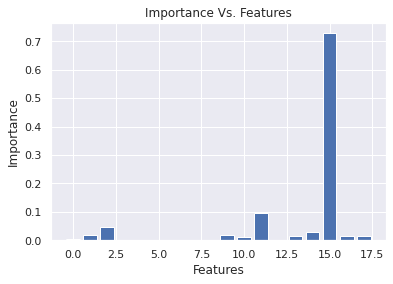


-------------------------------
Delete feature:  concavity error
test accuracy:  [0.87427215 0.87183544 0.88443038 0.89686709 0.89936709 0.88933544
 0.8868038  0.89439873 0.89439873 0.89186709 0.90193038 0.89693038
 0.89696203 0.89943038 0.89943038 0.90449367 0.90452532 0.89943038
 0.90705696 0.90702532 0.90705696 0.91205696 0.90705696 0.90449367
 0.90702532 0.90702532 0.90955696 0.91205696 0.90955696 0.90702532
 0.90702532 0.90955696 0.91208861 0.91458861 0.90955696 0.90955696
 0.90955696 0.90955696 0.90955696 0.90955696 0.90955696 0.90702532
 0.90955696 0.90955696 0.90955696 0.91205696 0.91205696 0.91205696
 0.90955696 0.90702532 0.90452532 0.90452532 0.90452532 0.90702532
 0.90702532 0.90702532 0.90702532 0.90952532 0.91205696 0.90702532
 0.91455696 0.91205696 0.91205696 0.91455696 0.90705696 0.91205696
 0.90705696 0.90955696 0.90708861 0.90958861 0.90458861 0.90708861
 0.90708861 0.90458861 0.89952532 0.89952532 0.90199367 0.90199367
 0.90199367 0.90199367 0.90452532 0.90199367 0.

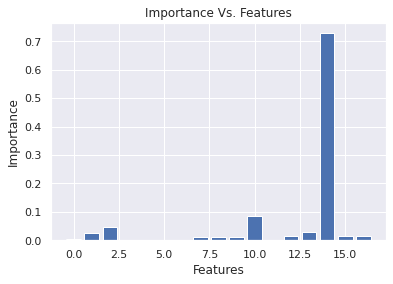


-------------------------------
Delete feature:  concave points error
test accuracy:  [0.87427215 0.87183544 0.88443038 0.89686709 0.89936709 0.88933544
 0.8868038  0.89439873 0.89439873 0.89186709 0.90193038 0.89693038
 0.89696203 0.89943038 0.89943038 0.90449367 0.90452532 0.89943038
 0.90705696 0.90702532 0.90705696 0.91205696 0.90705696 0.90449367
 0.90702532 0.90702532 0.90955696 0.91205696 0.90955696 0.90702532
 0.90702532 0.90955696 0.91208861 0.91458861 0.90955696 0.90955696
 0.90955696 0.90955696 0.90955696 0.90955696 0.90955696 0.90702532
 0.90955696 0.90955696 0.90955696 0.91205696 0.91205696 0.91205696
 0.90955696 0.90702532 0.90452532 0.90452532 0.90452532 0.90702532
 0.90702532 0.90702532 0.90702532 0.90952532 0.91205696 0.90702532
 0.91455696 0.91205696 0.91205696 0.91455696 0.90705696 0.91205696
 0.90705696 0.90955696 0.90708861 0.90958861 0.90458861 0.90708861
 0.90708861 0.90458861 0.89952532 0.89952532 0.90199367 0.90199367
 0.90199367 0.90199367 0.90452532 0.901993

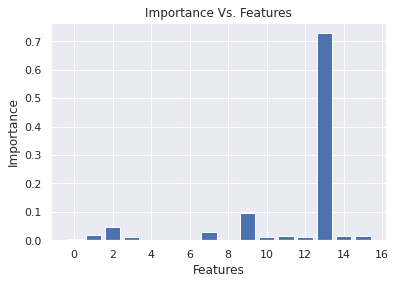


-------------------------------
Delete feature:  symmetry error
test accuracy:  [0.87427215 0.87183544 0.88443038 0.89686709 0.89936709 0.88933544
 0.8868038  0.89439873 0.89439873 0.89186709 0.90193038 0.89693038
 0.89696203 0.89943038 0.89943038 0.90449367 0.90452532 0.89943038
 0.90705696 0.90702532 0.90705696 0.91205696 0.90705696 0.90449367
 0.90702532 0.90702532 0.90955696 0.91205696 0.90955696 0.90702532
 0.90702532 0.90955696 0.91208861 0.91458861 0.90955696 0.90955696
 0.90955696 0.90955696 0.90955696 0.90955696 0.90955696 0.90702532
 0.90955696 0.90955696 0.90955696 0.91205696 0.91205696 0.91205696
 0.90955696 0.90702532 0.90452532 0.90452532 0.90452532 0.90702532
 0.90702532 0.90702532 0.90702532 0.90952532 0.91205696 0.90702532
 0.91455696 0.91205696 0.91205696 0.91455696 0.90705696 0.91205696
 0.90705696 0.90955696 0.90708861 0.90958861 0.90458861 0.90708861
 0.90708861 0.90458861 0.89952532 0.89952532 0.90199367 0.90199367
 0.90199367 0.90199367 0.90452532 0.90199367 0.9

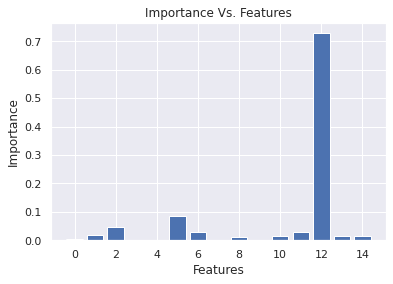


-------------------------------
Delete feature:  fractal dimension error
test accuracy:  [0.87427215 0.87183544 0.88443038 0.89686709 0.89936709 0.88933544
 0.8868038  0.89439873 0.89439873 0.89186709 0.90193038 0.89693038
 0.89696203 0.89943038 0.89943038 0.90449367 0.90452532 0.89943038
 0.90705696 0.90702532 0.90705696 0.91205696 0.90705696 0.90449367
 0.90702532 0.90702532 0.90955696 0.91205696 0.90955696 0.90702532
 0.90702532 0.90955696 0.91208861 0.91458861 0.90955696 0.90955696
 0.90955696 0.90955696 0.90955696 0.90955696 0.90955696 0.90702532
 0.90955696 0.90955696 0.90955696 0.91205696 0.91205696 0.91205696
 0.90955696 0.90702532 0.90452532 0.90452532 0.90452532 0.90702532
 0.90702532 0.90702532 0.90702532 0.90952532 0.91205696 0.90702532
 0.91455696 0.91205696 0.91205696 0.91455696 0.90705696 0.91205696
 0.90705696 0.90955696 0.90708861 0.90958861 0.90458861 0.90708861
 0.90708861 0.90458861 0.89952532 0.89952532 0.90199367 0.90199367
 0.90199367 0.90199367 0.90452532 0.901

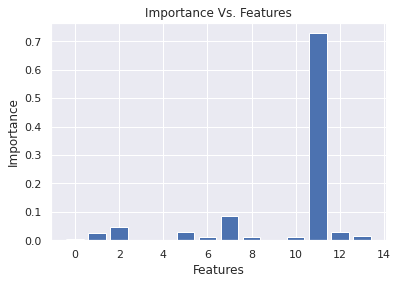


-------------------------------
Delete feature:  worst radius
test accuracy:  [0.87427215 0.87183544 0.88443038 0.89686709 0.89936709 0.88933544
 0.8868038  0.89439873 0.89439873 0.89186709 0.90193038 0.89693038
 0.89696203 0.89943038 0.89943038 0.90449367 0.90452532 0.89943038
 0.90705696 0.90702532 0.90705696 0.91205696 0.90705696 0.90449367
 0.90702532 0.90702532 0.90955696 0.91205696 0.90955696 0.90702532
 0.90702532 0.90955696 0.91208861 0.91458861 0.90955696 0.90955696
 0.90955696 0.90955696 0.90955696 0.90955696 0.90955696 0.90702532
 0.90955696 0.90955696 0.90955696 0.91205696 0.91205696 0.91205696
 0.90955696 0.90702532 0.90452532 0.90452532 0.90452532 0.90702532
 0.90702532 0.90702532 0.90702532 0.90952532 0.91205696 0.90702532
 0.91455696 0.91205696 0.91205696 0.91455696 0.90705696 0.91205696
 0.90705696 0.90955696 0.90708861 0.90958861 0.90458861 0.90708861
 0.90708861 0.90458861 0.89952532 0.89952532 0.90199367 0.90199367
 0.90199367 0.90199367 0.90452532 0.90199367 0.902

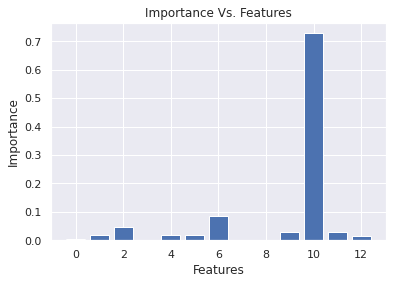


-------------------------------
Delete feature:  worst smoothness
test accuracy:  [0.87427215 0.87183544 0.88443038 0.89686709 0.89936709 0.88933544
 0.8868038  0.89439873 0.89439873 0.89186709 0.90193038 0.89693038
 0.89696203 0.89943038 0.89943038 0.90449367 0.90452532 0.89943038
 0.90705696 0.90702532 0.90705696 0.91205696 0.90705696 0.90449367
 0.90702532 0.90702532 0.90955696 0.91205696 0.90955696 0.90702532
 0.90702532 0.90955696 0.91208861 0.91458861 0.90955696 0.90955696
 0.90955696 0.90955696 0.90955696 0.90955696 0.90955696 0.90702532
 0.90955696 0.90955696 0.90955696 0.91205696 0.91205696 0.91205696
 0.90955696 0.90702532 0.90452532 0.90452532 0.90452532 0.90702532
 0.90702532 0.90702532 0.90702532 0.90952532 0.91205696 0.90702532
 0.91455696 0.91205696 0.91205696 0.91455696 0.90705696 0.91205696
 0.90705696 0.90955696 0.90708861 0.90958861 0.90458861 0.90708861
 0.90708861 0.90458861 0.89952532 0.89952532 0.90199367 0.90199367
 0.90199367 0.90199367 0.90452532 0.90199367 0

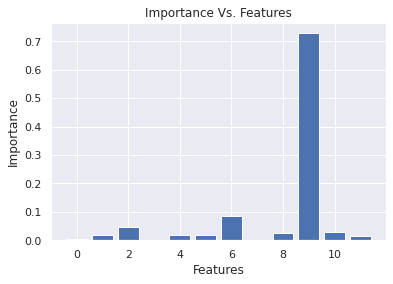


-------------------------------
Delete feature:  worst compactness
test accuracy:  [0.87427215 0.87183544 0.88443038 0.89686709 0.89936709 0.88933544
 0.8868038  0.89439873 0.89439873 0.89186709 0.90193038 0.89693038
 0.89696203 0.89943038 0.89943038 0.90449367 0.90452532 0.89943038
 0.90705696 0.90702532 0.90705696 0.91205696 0.90705696 0.90449367
 0.90702532 0.90702532 0.90955696 0.91205696 0.90955696 0.90702532
 0.90702532 0.90955696 0.91208861 0.91458861 0.90955696 0.90955696
 0.90955696 0.90955696 0.90955696 0.90955696 0.90955696 0.90702532
 0.90955696 0.90955696 0.90955696 0.91205696 0.91205696 0.91205696
 0.90955696 0.90702532 0.90452532 0.90452532 0.90452532 0.90702532
 0.90702532 0.90702532 0.90702532 0.90952532 0.91205696 0.90702532
 0.91455696 0.91205696 0.91205696 0.91455696 0.90705696 0.91205696
 0.90705696 0.90955696 0.90708861 0.90958861 0.90458861 0.90708861
 0.90708861 0.90458861 0.89952532 0.89952532 0.90199367 0.90199367
 0.90199367 0.90199367 0.90452532 0.90199367 

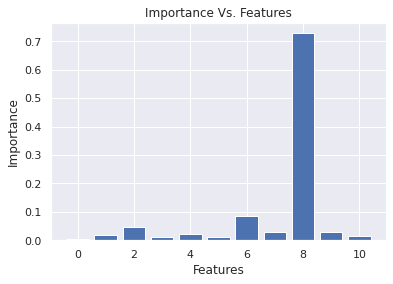


-------------------------------
Delete feature:  mean concave points
test accuracy:  [0.87427215 0.87183544 0.88443038 0.89686709 0.89936709 0.88933544
 0.8868038  0.89439873 0.89439873 0.89186709 0.90193038 0.89693038
 0.89696203 0.89943038 0.89943038 0.90449367 0.90452532 0.89943038
 0.90705696 0.90702532 0.90705696 0.91205696 0.90705696 0.90449367
 0.90702532 0.90702532 0.90955696 0.91205696 0.90955696 0.90702532
 0.90702532 0.90955696 0.91208861 0.91458861 0.90955696 0.90955696
 0.90955696 0.90955696 0.90955696 0.90955696 0.90955696 0.90702532
 0.90955696 0.90955696 0.90955696 0.91205696 0.91205696 0.91205696
 0.90955696 0.90702532 0.90452532 0.90452532 0.90452532 0.90702532
 0.90702532 0.90702532 0.90702532 0.90952532 0.91205696 0.90702532
 0.91455696 0.91205696 0.91205696 0.91455696 0.90705696 0.91205696
 0.90705696 0.90955696 0.90708861 0.90958861 0.90458861 0.90708861
 0.90708861 0.90458861 0.89952532 0.89952532 0.90199367 0.90199367
 0.90199367 0.90199367 0.90452532 0.9019936

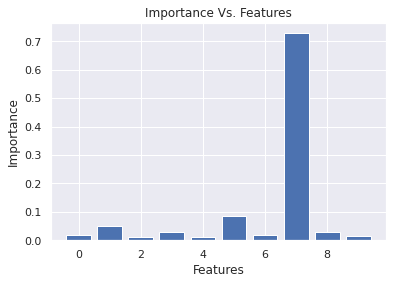


-------------------------------
Delete feature:  worst perimeter
test accuracy:  [0.87433544 0.86939873 0.87946203 0.88933544 0.89433544 0.8868038
 0.8918038  0.88436709 0.89186709 0.88689873 0.89939873 0.89186709
 0.89693038 0.90196203 0.89693038 0.89696203 0.90705696 0.89946203
 0.90705696 0.90955696 0.90705696 0.90952532 0.90705696 0.90449367
 0.90702532 0.90702532 0.90955696 0.91205696 0.90955696 0.90955696
 0.90702532 0.90955696 0.90955696 0.91205696 0.90955696 0.90955696
 0.90955696 0.90955696 0.90955696 0.90955696 0.90955696 0.90702532
 0.90955696 0.90955696 0.90955696 0.91205696 0.91205696 0.91205696
 0.90955696 0.90702532 0.90452532 0.90452532 0.90702532 0.90702532
 0.90702532 0.90702532 0.90702532 0.90952532 0.91205696 0.90702532
 0.91455696 0.91205696 0.91205696 0.91455696 0.90705696 0.91205696
 0.90955696 0.90955696 0.90708861 0.90958861 0.90458861 0.90708861
 0.90708861 0.90458861 0.89952532 0.89952532 0.90199367 0.90199367
 0.90199367 0.90199367 0.90452532 0.90199367 0.9

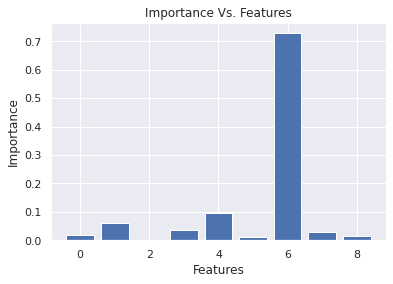


-------------------------------
Delete feature:  smoothness error
test accuracy:  [0.87433544 0.86939873 0.87946203 0.88933544 0.89433544 0.8868038
 0.8918038  0.88436709 0.89186709 0.88689873 0.89939873 0.89186709
 0.89693038 0.90196203 0.89693038 0.89696203 0.90705696 0.89946203
 0.90705696 0.90955696 0.90705696 0.90952532 0.90705696 0.90449367
 0.90702532 0.90702532 0.90955696 0.91205696 0.90955696 0.90955696
 0.90702532 0.90955696 0.90955696 0.91205696 0.90955696 0.90955696
 0.90955696 0.90955696 0.90955696 0.90955696 0.90955696 0.90702532
 0.90955696 0.90955696 0.90955696 0.91205696 0.91205696 0.91205696
 0.90955696 0.90702532 0.90452532 0.90452532 0.90702532 0.90702532
 0.90702532 0.90702532 0.90702532 0.90952532 0.91205696 0.90702532
 0.91455696 0.91205696 0.91205696 0.91455696 0.90705696 0.91205696
 0.90955696 0.90955696 0.90708861 0.90958861 0.90458861 0.90708861
 0.90708861 0.90458861 0.89952532 0.89952532 0.90199367 0.90199367
 0.90199367 0.90199367 0.90452532 0.90199367 0.

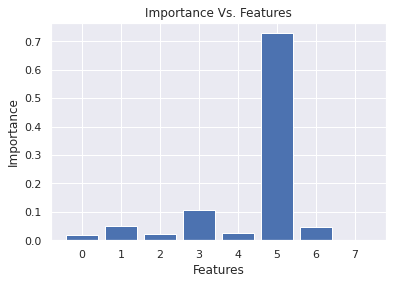


-------------------------------
Delete feature:  worst fractal dimension
test accuracy:  [0.87433544 0.86939873 0.87946203 0.88933544 0.89433544 0.8868038
 0.8918038  0.88436709 0.89186709 0.88689873 0.89939873 0.89186709
 0.89693038 0.90196203 0.89693038 0.89696203 0.90705696 0.89946203
 0.90705696 0.90955696 0.90705696 0.90952532 0.90705696 0.90449367
 0.90702532 0.90702532 0.90955696 0.91205696 0.90955696 0.90955696
 0.90702532 0.90955696 0.90955696 0.91205696 0.90955696 0.90955696
 0.90955696 0.90955696 0.90955696 0.90955696 0.90955696 0.90702532
 0.90955696 0.90955696 0.90955696 0.91205696 0.91205696 0.91205696
 0.90955696 0.90702532 0.90452532 0.90452532 0.90702532 0.90702532
 0.90702532 0.90702532 0.90702532 0.90952532 0.91205696 0.90702532
 0.91455696 0.91205696 0.91205696 0.91455696 0.90705696 0.91205696
 0.90955696 0.90955696 0.90708861 0.90958861 0.90458861 0.90708861
 0.90708861 0.90458861 0.89952532 0.89952532 0.90199367 0.90199367
 0.90199367 0.90199367 0.90452532 0.9019

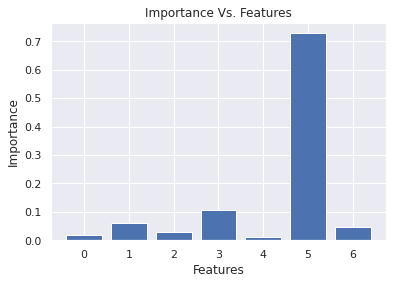


-------------------------------
Delete feature:  worst concavity
test accuracy:  [0.87433544 0.86939873 0.87946203 0.88933544 0.89433544 0.8868038
 0.8918038  0.88436709 0.89186709 0.88689873 0.89939873 0.89186709
 0.89693038 0.89943038 0.89943038 0.89696203 0.90705696 0.89946203
 0.90705696 0.90955696 0.90705696 0.90952532 0.90705696 0.90449367
 0.90702532 0.90702532 0.90955696 0.91205696 0.90955696 0.90955696
 0.90702532 0.90955696 0.90955696 0.91205696 0.90955696 0.90955696
 0.90955696 0.90955696 0.90955696 0.90955696 0.90955696 0.90702532
 0.90955696 0.90955696 0.90955696 0.91205696 0.91205696 0.91205696
 0.90955696 0.90702532 0.90452532 0.90452532 0.90702532 0.90702532
 0.90702532 0.90702532 0.90702532 0.90952532 0.91205696 0.90702532
 0.91455696 0.91205696 0.91205696 0.91455696 0.90705696 0.91205696
 0.90955696 0.90955696 0.90708861 0.90958861 0.90458861 0.90708861
 0.90708861 0.90458861 0.89952532 0.89952532 0.90199367 0.90199367
 0.90199367 0.90199367 0.90452532 0.90199367 0.9

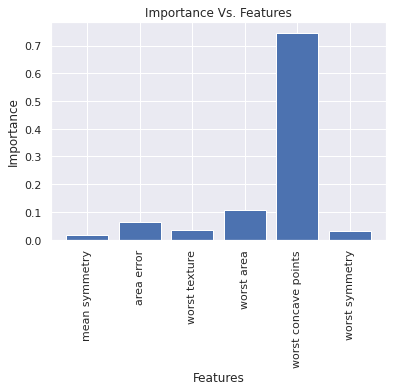


-------------------------------
Delete feature:  mean symmetry
test accuracy:  [0.87433544 0.86939873 0.87946203 0.88933544 0.89433544 0.8868038
 0.8918038  0.88436709 0.89186709 0.88689873 0.89939873 0.89186709
 0.89693038 0.89943038 0.89943038 0.89696203 0.90705696 0.89946203
 0.90705696 0.90955696 0.90705696 0.90952532 0.90705696 0.90449367
 0.90702532 0.90702532 0.90955696 0.91205696 0.90955696 0.90955696
 0.90702532 0.90955696 0.90955696 0.91205696 0.90955696 0.90955696
 0.90955696 0.90955696 0.90955696 0.90955696 0.90955696 0.90702532
 0.90955696 0.90955696 0.90955696 0.91205696 0.91205696 0.91205696
 0.90955696 0.90702532 0.90452532 0.90452532 0.90702532 0.90702532
 0.90702532 0.90702532 0.90702532 0.90952532 0.91205696 0.90702532
 0.91455696 0.91205696 0.91205696 0.91455696 0.90705696 0.91205696
 0.90955696 0.90955696 0.90708861 0.90958861 0.90458861 0.90708861
 0.90708861 0.90458861 0.89952532 0.89952532 0.90199367 0.90199367
 0.90199367 0.90199367 0.90452532 0.90199367 0.902

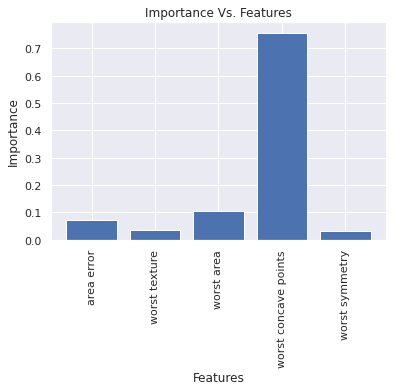


-------------------------------
Delete feature:  worst symmetry
test accuracy:  [0.87433544 0.86939873 0.87946203 0.88933544 0.89433544 0.8868038
 0.8918038  0.88436709 0.89186709 0.88689873 0.89939873 0.89186709
 0.89693038 0.89943038 0.89943038 0.89696203 0.90705696 0.89946203
 0.90705696 0.90955696 0.90705696 0.90952532 0.90705696 0.90449367
 0.90702532 0.90702532 0.90955696 0.91205696 0.90955696 0.90955696
 0.90702532 0.90955696 0.90955696 0.91205696 0.90955696 0.90955696
 0.90955696 0.90955696 0.90955696 0.90955696 0.90955696 0.90702532
 0.90955696 0.90955696 0.90955696 0.91205696 0.91205696 0.91205696
 0.90955696 0.90702532 0.90452532 0.90452532 0.90702532 0.90702532
 0.90702532 0.90702532 0.90702532 0.90952532 0.91205696 0.90702532
 0.91455696 0.91205696 0.91205696 0.91455696 0.90705696 0.91205696
 0.90955696 0.90955696 0.90708861 0.90958861 0.90458861 0.90708861
 0.90708861 0.90458861 0.89952532 0.89952532 0.90199367 0.90199367
 0.90199367 0.90199367 0.90452532 0.90199367 0.90

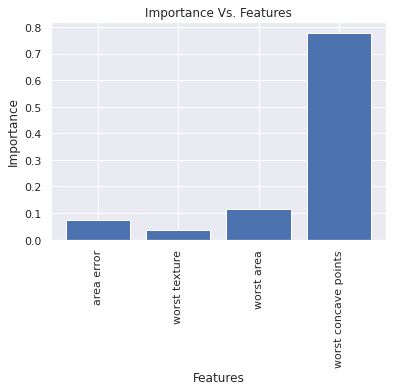


-------------------------------
Delete feature:  worst texture
test accuracy:  [0.85664557 0.82908228 0.8718038  0.86924051 0.89686709 0.87683544
 0.87677215 0.88683544 0.88686709 0.88686709 0.89439873 0.88686709
 0.89439873 0.88933544 0.89693038 0.89949367 0.90452532 0.89693038
 0.90705696 0.90955696 0.90452532 0.90952532 0.90705696 0.90702532
 0.90702532 0.90702532 0.90955696 0.91205696 0.90955696 0.90955696
 0.90702532 0.90955696 0.90955696 0.91205696 0.90955696 0.90955696
 0.90955696 0.90955696 0.90955696 0.90955696 0.90955696 0.90702532
 0.90955696 0.90955696 0.90955696 0.91205696 0.91205696 0.91205696
 0.90955696 0.90702532 0.90452532 0.90452532 0.90202532 0.90702532
 0.90702532 0.90702532 0.90702532 0.90952532 0.91205696 0.90702532
 0.91205696 0.91205696 0.91205696 0.91455696 0.90705696 0.91205696
 0.90705696 0.91205696 0.90708861 0.90958861 0.90458861 0.90708861
 0.90708861 0.90458861 0.89952532 0.89952532 0.90199367 0.90199367
 0.90199367 0.90199367 0.90452532 0.90199367 0.90

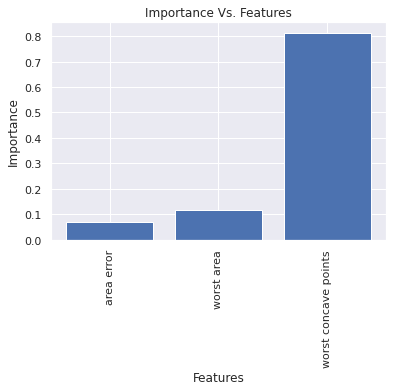


-------------------------------
Delete feature:  area error
test accuracy:  [0.86398734 0.83636076 0.89686709 0.8968038  0.88683544 0.8768038
 0.87933544 0.87927215 0.88183544 0.8743038  0.88933544 0.88686709
 0.89443038 0.88939873 0.89693038 0.89693038 0.90702532 0.89689873
 0.90705696 0.90952532 0.90452532 0.90952532 0.90705696 0.90955696
 0.90955696 0.90702532 0.90955696 0.90955696 0.90955696 0.90955696
 0.90955696 0.90955696 0.91208861 0.91458861 0.90955696 0.90955696
 0.90955696 0.90955696 0.90955696 0.90955696 0.90955696 0.90955696
 0.90955696 0.90955696 0.90955696 0.91205696 0.91205696 0.91205696
 0.90955696 0.90702532 0.90452532 0.90452532 0.90452532 0.90702532
 0.90702532 0.90702532 0.90702532 0.90952532 0.91205696 0.90702532
 0.91205696 0.91205696 0.91205696 0.91455696 0.90705696 0.91205696
 0.90455696 0.90705696 0.90458861 0.90708861 0.90458861 0.90455696
 0.90708861 0.90458861 0.90458861 0.90458861 0.89949367 0.89949367
 0.90199367 0.90199367 0.90199367 0.90199367 0.902025

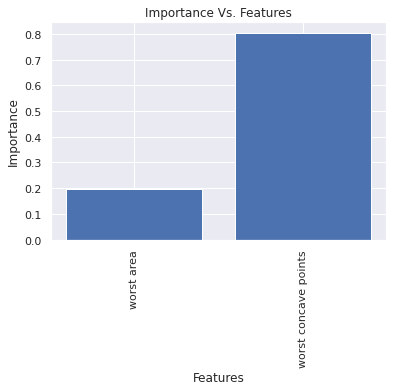


-------------------------------
Delete feature:  worst area
test accuracy:  [0.88189873 0.86683544 0.88689873 0.88436709 0.89443038 0.88939873
 0.90702532 0.89193038 0.90193038 0.89689873 0.90702532 0.89949367
 0.91199367 0.91202532 0.91452532 0.91705696 0.91955696 0.91455696
 0.91955696 0.91955696 0.91955696 0.91958861 0.92208861 0.92208861
 0.92208861 0.92208861 0.91708861 0.92208861 0.92208861 0.92208861
 0.91958861 0.92208861 0.92208861 0.92462025 0.92208861 0.92208861
 0.92458861 0.91702532 0.91955696 0.91702532 0.91955696 0.91955696
 0.91955696 0.91955696 0.91955696 0.91702532 0.91702532 0.91702532
 0.91702532 0.91702532 0.91702532 0.91702532 0.91955696 0.91702532
 0.91955696 0.91955696 0.91955696 0.91955696 0.91955696 0.91955696
 0.91702532 0.91955696 0.91702532 0.91955696 0.91955696 0.91955696
 0.91955696 0.91955696 0.91955696 0.91955696 0.91955696 0.91955696
 0.91955696 0.91955696 0.91702532 0.91702532 0.91702532 0.91702532
 0.91702532 0.91702532 0.91702532 0.91702532 0.91952

In [ ]:
from sklearn import tree
dt = tree.DecisionTreeClassifier()
removed_features, accuracy = Feature_selector(X_train,Y_train)

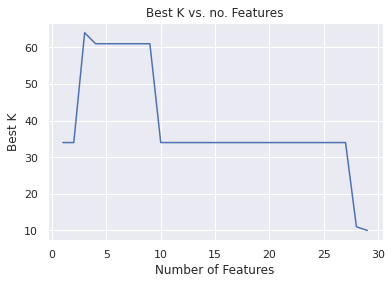

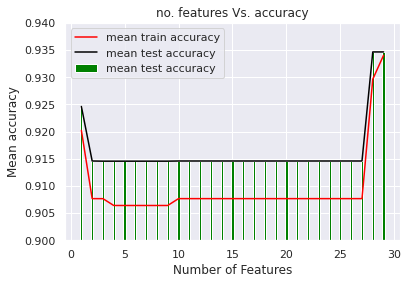

In [ ]:
axis = range(1,len(accuracy)+1)
k,train_acc,test_acc = [],[],[]
for ix in range(len(accuracy)):
  k.append(accuracy[len(accuracy)-ix-1][1])
  train_acc.append(accuracy[len(accuracy)-ix-1][2])
  test_acc.append(accuracy[len(accuracy)-ix-1][3])
plt.plot(axis,k)
plt.xlabel('Number of Features')
plt.ylabel('Best K')
plt.title('Best K vs. no. Features')
plt.show()
plt.plot(axis,train_acc,label='mean train accuracy',color='red')
plt.plot(axis,test_acc,label = 'mean test accuracy',color='black')
plt.bar(axis,test_acc,label = 'mean test accuracy',color='green',width=0.2)
plt.ylim([0.9,0.94])
plt.legend()
plt.xlabel('Number of Features')
plt.ylabel('Mean accuracy')
plt.title('no. features Vs. accuracy')
plt.show()

**Answer Part 3.8:**

From the figure, the test accuracy drop significantly when the number of features less than 28, and remain stable for number of features between 2 to 27. The two essential features are 'worst area' and 'worst concave point'.

## Part 4: Standardization [1 Marks]

Standardizing the data usually means scaling our data to have a mean of zero and a standard deviation of one. 

**Note:** When we standardize a dataset, do we care if the data points are in our training set or test set? Yes! The training set is available for us to train a model - we can use it however we want. The test set, however, represents a subset of data that is not available for us during training. For example, the test set can represent the data that someone who bought our model would use to see how the model performs (which they are not willing to share with us).
Therefore, we cannot compute the mean or standard deviation of the whole dataset to standardize it - we can only calculate the mean and standard deviation of the training set. However, when we sell a model to someone, we can say what our scalers (mean and standard deviation of our training set) was. They can scale their data (test set) with our training set's mean and standard deviation. Of course, there is no guarantee that the test set would have a mean of zero and a standard deviation of one, but the model should still work well enough.

**To summarize: We fit the StandardScaler only on the training set. We transform both training and test sets with that scaler.**

1. Standardize the training  and test data ([Help](https://scikit-learn.org/stable/modules/preprocessing.html)) 

2. Call your ``Feature_selector`` function on the standardized training data with a threshold of 95\%. 
 * Plot the Cross validation accuracy when we have the standardized data (this part) and the original training data (last part) vs. the Number of features in a single plot (to compare them easily).

3. Discuss how standardization (helped/hurt) your model and its performance? Discuss which cases lead to a higher cross validation accuracy (how many features? which features? What K?)


[[1.149e+01 1.459e+01 7.399e+01 ... 7.431e-02 2.941e-01 9.180e-02]
 [1.049e+01 1.861e+01 6.686e+01 ... 6.528e-02 2.213e-01 7.842e-02]
 [1.225e+01 1.794e+01 7.827e+01 ... 8.211e-02 3.113e-01 8.132e-02]
 ...
 [9.436e+00 1.832e+01 5.982e+01 ... 5.052e-02 2.454e-01 8.136e-02]
 [9.720e+00 1.822e+01 6.073e+01 ... 0.000e+00 1.909e-01 6.559e-02]
 [1.151e+01 2.393e+01 7.452e+01 ... 9.653e-02 2.112e-01 8.732e-02]]

-------------------------

[[-0.74998027 -1.09978744 -0.74158608 ... -0.6235968   0.07754241
   0.45062841]
 [-1.02821446 -0.1392617  -1.02980434 ... -0.7612376  -1.07145262
  -0.29541379]
 [-0.53852228 -0.29934933 -0.56857428 ... -0.50470441  0.34900827
  -0.13371556]
 ...
 [-1.3214733  -0.20855336 -1.3143845  ... -0.98621857 -0.69108476
  -0.13148524]
 [-1.24245479 -0.23244704 -1.27759928 ... -1.7562754  -1.55125275
  -1.01078909]
 [-0.74441558  1.13188181 -0.72016173 ... -0.28490593 -1.2308599
   0.20083251]]
test accuracy:  [0.95224684 0.94474684 0.96237342 0.96237342 0.95227848 0

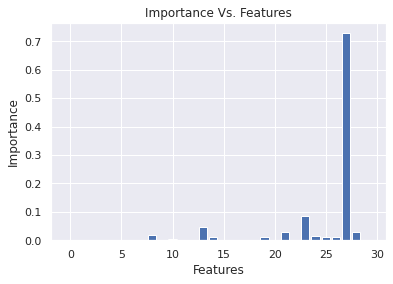


-------------------------------
Delete feature:  mean radius
test accuracy:  [0.95224684 0.94474684 0.95731013 0.95734177 0.95474684 0.95731013
 0.95987342 0.96496835 0.95984177 0.95987342 0.96237342 0.96493671
 0.95234177 0.95990506 0.95234177 0.95237342 0.94734177 0.94987342
 0.94481013 0.94981013 0.94981013 0.94981013 0.94731013 0.94984177
 0.94734177 0.94984177 0.94227848 0.94481013 0.94227848 0.94481013
 0.94477848 0.94481013 0.94477848 0.94981013 0.94727848 0.94727848
 0.94727848 0.94477848 0.94224684 0.94981013 0.93971519 0.93971519
 0.93971519 0.93721519 0.93971519 0.93721519 0.93721519 0.93721519
 0.93721519 0.93721519 0.93721519 0.93721519 0.93471519 0.93471519
 0.93471519 0.93471519 0.93221519 0.93221519 0.93221519 0.93221519
 0.92968354 0.93221519 0.92462025 0.9246519  0.9246519  0.92468354
 0.9246519  0.9221519  0.9246519  0.9246519  0.9221519  0.9221519
 0.9196519  0.9221519  0.91712025 0.91962025 0.91712025 0.9221519
 0.91962025 0.91962025 0.91208861 0.91458861 0.914588

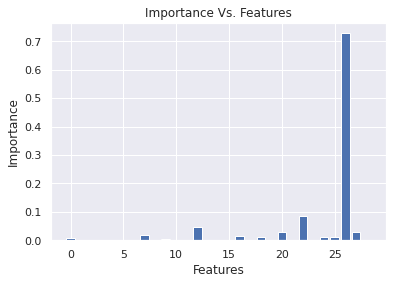


-------------------------------
Delete feature:  mean perimeter
test accuracy:  [0.94468354 0.94724684 0.95481013 0.95484177 0.95474684 0.95477848
 0.95734177 0.96243671 0.95734177 0.95734177 0.95734177 0.96240506
 0.94731013 0.95234177 0.94984177 0.94984177 0.94734177 0.95237342
 0.94734177 0.94984177 0.94481013 0.94731013 0.94481013 0.94481013
 0.94481013 0.94481013 0.94227848 0.94481013 0.94481013 0.94481013
 0.94227848 0.94227848 0.93974684 0.94481013 0.93721519 0.93974684
 0.93471519 0.93974684 0.94224684 0.94224684 0.93971519 0.93971519
 0.93721519 0.93721519 0.93721519 0.93721519 0.93721519 0.93721519
 0.93468354 0.93471519 0.93468354 0.93468354 0.93218354 0.93468354
 0.92968354 0.92968354 0.92968354 0.92968354 0.92968354 0.92968354
 0.92968354 0.92968354 0.9271519  0.92968354 0.92468354 0.92468354
 0.9221519  0.9196519  0.9221519  0.9221519  0.9196519  0.9196519
 0.9196519  0.9196519  0.9196519  0.9196519  0.91462025 0.91212025
 0.91462025 0.91712025 0.91712025 0.91712025 0.91

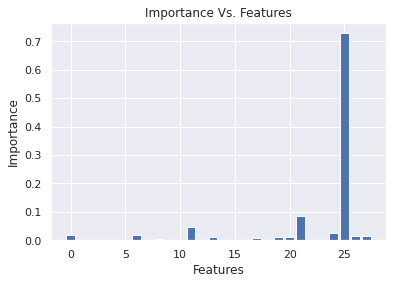


-------------------------------
Delete feature:  mean area
test accuracy:  [0.94468354 0.93968354 0.95731013 0.95484177 0.95474684 0.94971519
 0.95734177 0.96237342 0.95227848 0.94977848 0.94977848 0.95484177
 0.94731013 0.95487342 0.94477848 0.94984177 0.94481013 0.94987342
 0.94734177 0.94984177 0.94477848 0.94477848 0.93974684 0.94224684
 0.93718354 0.94477848 0.93974684 0.94731013 0.93474684 0.93977848
 0.93974684 0.93974684 0.93471519 0.93724684 0.93471519 0.93724684
 0.93471519 0.93471519 0.93471519 0.93471519 0.93468354 0.93468354
 0.93468354 0.93468354 0.93468354 0.93468354 0.93468354 0.93468354
 0.93218354 0.93468354 0.93468354 0.93218354 0.93468354 0.93468354
 0.92968354 0.93468354 0.92968354 0.93218354 0.92968354 0.92968354
 0.92968354 0.92968354 0.92468354 0.92718354 0.92218354 0.92218354
 0.92218354 0.92218354 0.91718354 0.91718354 0.91968354 0.92218354
 0.9196519  0.9196519  0.9171519  0.9171519  0.91462025 0.9146519
 0.91212025 0.9146519  0.90708861 0.90962025 0.9070886

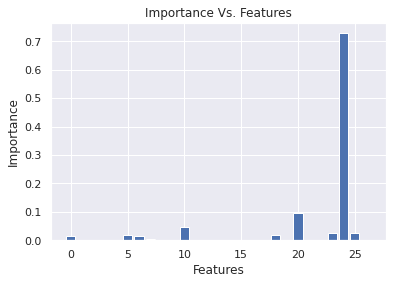


-------------------------------
Delete feature:  mean smoothness
test accuracy:  [0.94718354 0.94474684 0.95227848 0.95731013 0.95224684 0.95477848
 0.94977848 0.95481013 0.95731013 0.95481013 0.95231013 0.95231013
 0.94981013 0.95487342 0.94981013 0.95487342 0.94727848 0.95234177
 0.94224684 0.94474684 0.93721519 0.94477848 0.93974684 0.94477848
 0.94224684 0.94224684 0.93471519 0.94481013 0.94227848 0.94227848
 0.93974684 0.93724684 0.93724684 0.93977848 0.93724684 0.94227848
 0.93724684 0.93977848 0.93977848 0.93977848 0.93721519 0.93724684
 0.93471519 0.93471519 0.93721519 0.93721519 0.93721519 0.93721519
 0.93471519 0.93721519 0.93221519 0.93471519 0.93471519 0.93221519
 0.93218354 0.93221519 0.92718354 0.93221519 0.92968354 0.92968354
 0.92968354 0.92968354 0.92468354 0.92468354 0.92218354 0.92218354
 0.91968354 0.92218354 0.91968354 0.92218354 0.92218354 0.92218354
 0.91968354 0.91968354 0.9146519  0.9146519  0.91212025 0.91462025
 0.91212025 0.91212025 0.91212025 0.91212025 0.

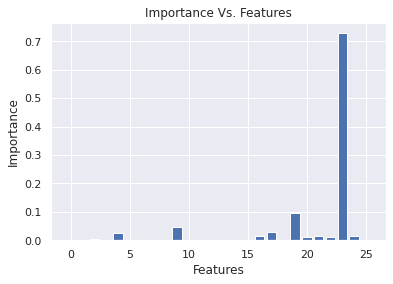


-------------------------------
Delete feature:  mean texture
test accuracy:  [0.94718354 0.94721519 0.95477848 0.95477848 0.95724684 0.95474684
 0.95477848 0.95477848 0.94974684 0.94724684 0.95227848 0.95227848
 0.94224684 0.94977848 0.94224684 0.94727848 0.93471519 0.94481013
 0.93724684 0.94227848 0.93474684 0.93474684 0.93724684 0.94477848
 0.93721519 0.93974684 0.93721519 0.93721519 0.93218354 0.93471519
 0.93221519 0.93471519 0.93221519 0.93724684 0.93474684 0.93724684
 0.93474684 0.93474684 0.93221519 0.93221519 0.93221519 0.93471519
 0.93471519 0.93471519 0.93471519 0.93471519 0.93221519 0.93471519
 0.93471519 0.93471519 0.93471519 0.93471519 0.93471519 0.93221519
 0.93471519 0.93471519 0.92968354 0.92968354 0.92968354 0.92968354
 0.92968354 0.92968354 0.92718354 0.92718354 0.92718354 0.92718354
 0.9246519  0.9246519  0.9246519  0.9246519  0.9246519  0.92718354
 0.9246519  0.9246519  0.92212025 0.92212025 0.91962025 0.91962025
 0.91712025 0.91712025 0.91712025 0.91712025 0.917

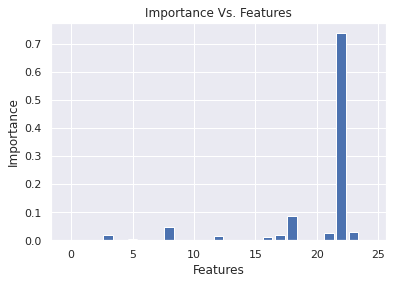


-------------------------------
Delete feature:  mean compactness
test accuracy:  [0.94971519 0.94721519 0.95477848 0.95731013 0.95474684 0.95724684
 0.96234177 0.95227848 0.95227848 0.95227848 0.95227848 0.95227848
 0.94977848 0.95227848 0.94224684 0.94727848 0.93974684 0.94731013
 0.94731013 0.94981013 0.94481013 0.94734177 0.93977848 0.94481013
 0.94477848 0.94984177 0.94224684 0.94224684 0.93724684 0.93974684
 0.93221519 0.93974684 0.93221519 0.93724684 0.93474684 0.93474684
 0.93724684 0.93474684 0.93474684 0.93474684 0.93474684 0.93724684
 0.93471519 0.93471519 0.93721519 0.93471519 0.93721519 0.93721519
 0.93468354 0.93468354 0.93468354 0.93468354 0.93218354 0.93468354
 0.9296519  0.93468354 0.9271519  0.9296519  0.9271519  0.9271519
 0.9246519  0.9246519  0.9246519  0.9246519  0.9246519  0.9246519
 0.9246519  0.9246519  0.9246519  0.92718354 0.92718354 0.92718354
 0.9246519  0.9246519  0.92212025 0.92212025 0.91962025 0.91962025
 0.91462025 0.91712025 0.91712025 0.91712025 0.9

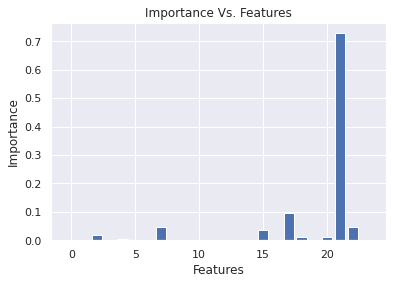


-------------------------------
Delete feature:  mean concavity
test accuracy:  [0.94974684 0.9396519  0.95481013 0.95227848 0.95474684 0.95474684
 0.95731013 0.95481013 0.95231013 0.95481013 0.95227848 0.94977848
 0.94977848 0.95227848 0.93974684 0.95227848 0.93974684 0.94477848
 0.94227848 0.94477848 0.94227848 0.94231013 0.93977848 0.93977848
 0.93974684 0.93974684 0.93721519 0.93974684 0.93471519 0.93471519
 0.93471519 0.93974684 0.93974684 0.93974684 0.93474684 0.93724684
 0.93474684 0.93474684 0.93724684 0.93724684 0.93471519 0.93724684
 0.93471519 0.93471519 0.93471519 0.93471519 0.93218354 0.93218354
 0.9296519  0.93218354 0.9296519  0.9296519  0.9296519  0.9296519
 0.9271519  0.9296519  0.9246519  0.9246519  0.9246519  0.9246519
 0.9246519  0.9246519  0.9246519  0.9246519  0.9246519  0.9246519
 0.9246519  0.9246519  0.9221519  0.92718354 0.92718354 0.92718354
 0.9246519  0.92718354 0.9196519  0.9221519  0.9221519  0.9221519
 0.9221519  0.9221519  0.9196519  0.9196519  0.91965

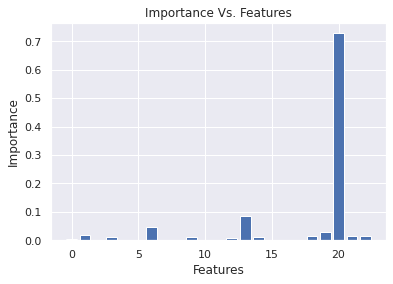


-------------------------------
Delete feature:  mean fractal dimension
test accuracy:  [0.94971519 0.94468354 0.9471519  0.94974684 0.95977848 0.95471519
 0.95731013 0.95481013 0.95227848 0.95231013 0.95227848 0.95231013
 0.94724684 0.95227848 0.94471519 0.94724684 0.94474684 0.94474684
 0.93724684 0.93974684 0.93974684 0.93724684 0.93724684 0.93724684
 0.93471519 0.93724684 0.93218354 0.93471519 0.93468354 0.93971519
 0.93471519 0.93721519 0.92968354 0.93724684 0.93221519 0.93724684
 0.93221519 0.93974684 0.92968354 0.93221519 0.92968354 0.93221519
 0.93471519 0.93471519 0.93471519 0.93471519 0.93218354 0.93471519
 0.93218354 0.93218354 0.93218354 0.93218354 0.93218354 0.93218354
 0.93218354 0.93218354 0.92718354 0.92468354 0.92718354 0.92718354
 0.92718354 0.92718354 0.9246519  0.9246519  0.9246519  0.92718354
 0.9246519  0.9246519  0.9246519  0.9246519  0.9246519  0.92718354
 0.9246519  0.92718354 0.92718354 0.92718354 0.92468354 0.92718354
 0.92718354 0.92718354 0.9246519  0.9271

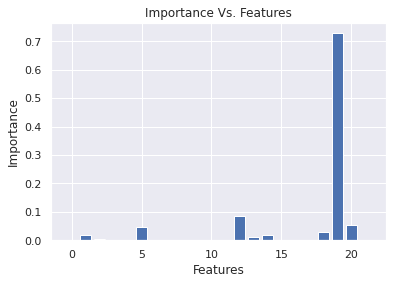


-------------------------------
Delete feature:  mean concave points
test accuracy:  [0.94718354 0.9421519  0.94721519 0.94724684 0.95224684 0.95474684
 0.95481013 0.95481013 0.95477848 0.95227848 0.95477848 0.94974684
 0.94974684 0.94721519 0.94474684 0.95231013 0.93971519 0.93971519
 0.93971519 0.93971519 0.93721519 0.93974684 0.93218354 0.93721519
 0.93218354 0.93724684 0.93218354 0.93471519 0.93218354 0.93218354
 0.92968354 0.93468354 0.92718354 0.93224684 0.92971519 0.93221519
 0.93221519 0.93221519 0.93221519 0.93221519 0.93221519 0.93221519
 0.92968354 0.93221519 0.93471519 0.93471519 0.93218354 0.93471519
 0.93221519 0.92971519 0.92718354 0.92718354 0.92718354 0.92968354
 0.9246519  0.92968354 0.9246519  0.9271519  0.9246519  0.9246519
 0.9246519  0.9246519  0.9221519  0.91962025 0.9221519  0.9246519
 0.91962025 0.9246519  0.9221519  0.9221519  0.91962025 0.9221519
 0.91962025 0.91962025 0.9221519  0.9246519  0.9196519  0.92218354
 0.9196519  0.9196519  0.9196519  0.9196519  0

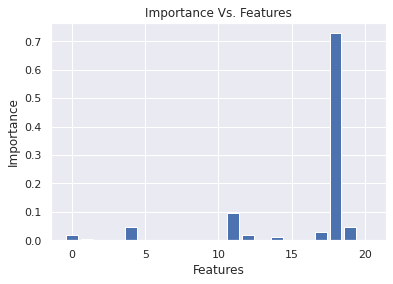


-------------------------------
Delete feature:  texture error
test accuracy:  [0.94724684 0.93208861 0.95727848 0.94974684 0.94721519 0.95224684
 0.95734177 0.95481013 0.95227848 0.95731013 0.95731013 0.95481013
 0.94977848 0.94974684 0.94724684 0.95231013 0.94221519 0.94471519
 0.94221519 0.94224684 0.93724684 0.93724684 0.93724684 0.93724684
 0.93221519 0.93721519 0.93721519 0.93721519 0.93721519 0.93974684
 0.93974684 0.93974684 0.93221519 0.94231013 0.93474684 0.93724684
 0.93474684 0.93724684 0.92971519 0.92971519 0.93221519 0.92971519
 0.93221519 0.93221519 0.93221519 0.93221519 0.93221519 0.93221519
 0.92968354 0.93221519 0.92968354 0.92968354 0.92968354 0.92968354
 0.92968354 0.92968354 0.92968354 0.92968354 0.9296519  0.92968354
 0.92968354 0.93218354 0.9246519  0.9296519  0.9246519  0.9246519
 0.92212025 0.9271519  0.92212025 0.92212025 0.91962025 0.9221519
 0.9221519  0.9221519  0.92468354 0.92468354 0.9196519  0.9196519
 0.9196519  0.9196519  0.9196519  0.9196519  0.91965

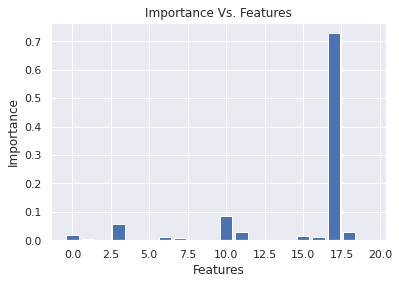


-------------------------------
Delete feature:  perimeter error
test accuracy:  [0.94221519 0.93208861 0.95727848 0.95477848 0.95224684 0.95474684
 0.95477848 0.95734177 0.94724684 0.94727848 0.95227848 0.95481013
 0.94977848 0.94977848 0.94724684 0.95227848 0.94724684 0.94724684
 0.94721519 0.94724684 0.93718354 0.94474684 0.94224684 0.94224684
 0.93721519 0.93721519 0.93721519 0.93974684 0.93721519 0.93974684
 0.93721519 0.94477848 0.93721519 0.93974684 0.93974684 0.94224684
 0.93974684 0.93974684 0.93474684 0.93724684 0.93221519 0.93474684
 0.93224684 0.93474684 0.92968354 0.92718354 0.92968354 0.92718354
 0.92968354 0.92968354 0.92968354 0.92968354 0.92968354 0.92968354
 0.93218354 0.93218354 0.93218354 0.92718354 0.92968354 0.92968354
 0.92718354 0.92718354 0.92968354 0.92968354 0.92968354 0.92968354
 0.92968354 0.92968354 0.92968354 0.92968354 0.92968354 0.92968354
 0.92718354 0.92968354 0.92718354 0.92968354 0.92718354 0.92718354
 0.92468354 0.92468354 0.92468354 0.92468354 0.

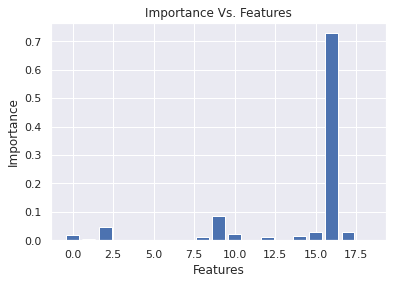


-------------------------------
Delete feature:  smoothness error
test accuracy:  [0.94218354 0.9346519  0.95727848 0.95224684 0.95977848 0.95224684
 0.94974684 0.95227848 0.94724684 0.95481013 0.95227848 0.94981013
 0.94977848 0.95231013 0.94974684 0.95477848 0.94727848 0.94981013
 0.94724684 0.94977848 0.94724684 0.94727848 0.94474684 0.94474684
 0.94474684 0.94477848 0.93974684 0.93974684 0.93721519 0.93721519
 0.93721519 0.93721519 0.93721519 0.93721519 0.93721519 0.93721519
 0.93218354 0.93721519 0.93471519 0.93974684 0.93974684 0.94224684
 0.93724684 0.93724684 0.93721519 0.94224684 0.92968354 0.93221519
 0.9271519  0.93218354 0.92968354 0.93218354 0.92968354 0.92968354
 0.93218354 0.92968354 0.93218354 0.93218354 0.93218354 0.92968354
 0.92968354 0.92968354 0.92968354 0.93218354 0.92968354 0.93218354
 0.92718354 0.92968354 0.92718354 0.92968354 0.92718354 0.92718354
 0.9246519  0.92718354 0.92718354 0.92718354 0.9221519  0.9246519
 0.9221519  0.92968354 0.9246519  0.9271519  0.

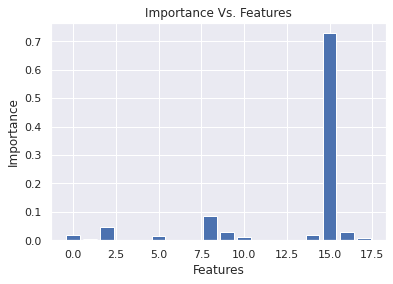


-------------------------------
Delete feature:  compactness error
test accuracy:  [0.94977848 0.9346519  0.95477848 0.96234177 0.95977848 0.95221519
 0.95477848 0.95731013 0.95227848 0.95231013 0.95727848 0.95481013
 0.95481013 0.95231013 0.94977848 0.94977848 0.94727848 0.94727848
 0.94727848 0.94977848 0.94474684 0.94474684 0.94221519 0.94474684
 0.94221519 0.94474684 0.93974684 0.94474684 0.93974684 0.94224684
 0.94224684 0.94224684 0.94224684 0.93974684 0.93971519 0.93971519
 0.93971519 0.93971519 0.93971519 0.94224684 0.94224684 0.94224684
 0.94474684 0.94224684 0.93471519 0.93974684 0.93468354 0.93218354
 0.93218354 0.93468354 0.92968354 0.93218354 0.92968354 0.93468354
 0.92968354 0.93468354 0.93218354 0.93218354 0.92968354 0.92968354
 0.92968354 0.92968354 0.93218354 0.93218354 0.93218354 0.93218354
 0.93218354 0.93218354 0.93218354 0.93218354 0.93218354 0.93218354
 0.92968354 0.92968354 0.9271519  0.92968354 0.9246519  0.92968354
 0.9221519  0.92718354 0.9246519  0.92718354 

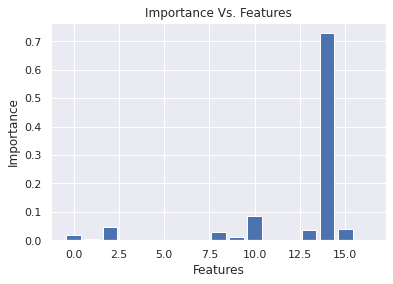


-------------------------------
Delete feature:  concavity error
test accuracy:  [0.95227848 0.93962025 0.95981013 0.96484177 0.95977848 0.95977848
 0.95981013 0.96487342 0.94724684 0.95981013 0.95227848 0.95731013
 0.95734177 0.95484177 0.94721519 0.95227848 0.94471519 0.95231013
 0.94977848 0.95231013 0.94471519 0.94724684 0.94471519 0.94474684
 0.94471519 0.94471519 0.94221519 0.94471519 0.94221519 0.94221519
 0.94221519 0.93971519 0.94221519 0.94477848 0.93971519 0.93974684
 0.93971519 0.93971519 0.93971519 0.93971519 0.93971519 0.93971519
 0.93971519 0.93971519 0.93971519 0.93721519 0.93218354 0.93218354
 0.93718354 0.93468354 0.93718354 0.93468354 0.92968354 0.93218354
 0.93468354 0.93218354 0.93218354 0.93218354 0.93218354 0.93218354
 0.93218354 0.93218354 0.93218354 0.93218354 0.93468354 0.93468354
 0.93468354 0.93468354 0.93218354 0.93468354 0.93218354 0.93468354
 0.93218354 0.93218354 0.9296519  0.9296519  0.9296519  0.9296519
 0.9271519  0.92968354 0.92718354 0.92718354 0.9

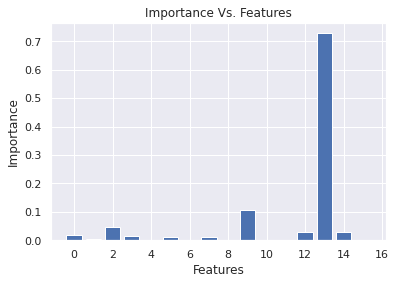


-------------------------------
Delete feature:  symmetry error
test accuracy:  [0.94721519 0.94468354 0.95977848 0.95727848 0.96231013 0.95977848
 0.95981013 0.96484177 0.95224684 0.95981013 0.95477848 0.95477848
 0.95731013 0.95987342 0.95731013 0.95731013 0.95224684 0.95731013
 0.94974684 0.95231013 0.94977848 0.95481013 0.95227848 0.95481013
 0.94974684 0.95227848 0.94977848 0.94977848 0.94977848 0.94977848
 0.94477848 0.94977848 0.94474684 0.94224684 0.94224684 0.94481013
 0.94477848 0.93977848 0.93721519 0.93974684 0.93721519 0.93721519
 0.93468354 0.93718354 0.93468354 0.93974684 0.93468354 0.93718354
 0.93468354 0.93718354 0.93468354 0.93218354 0.93218354 0.92968354
 0.93218354 0.93471519 0.93221519 0.93221519 0.92968354 0.93221519
 0.92968354 0.93221519 0.92968354 0.92968354 0.92968354 0.93218354
 0.93218354 0.93218354 0.93218354 0.93218354 0.93218354 0.93218354
 0.93468354 0.93468354 0.93218354 0.93218354 0.92968354 0.92968354
 0.92718354 0.92718354 0.92468354 0.92468354 0.9

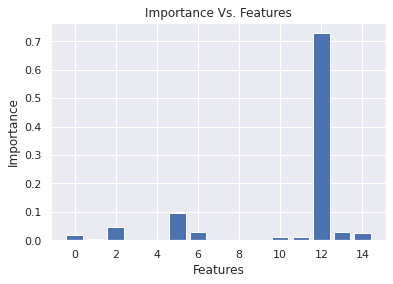


-------------------------------
Delete feature:  concave points error
test accuracy:  [0.94468354 0.95474684 0.95724684 0.95981013 0.95477848 0.96234177
 0.95981013 0.95984177 0.95727848 0.96234177 0.95727848 0.95981013
 0.95477848 0.95981013 0.95727848 0.95727848 0.95477848 0.95731013
 0.95731013 0.95731013 0.95477848 0.95477848 0.95477848 0.95477848
 0.95224684 0.95477848 0.94974684 0.95227848 0.95227848 0.95227848
 0.94974684 0.95227848 0.95227848 0.95227848 0.94974684 0.94974684
 0.94724684 0.94974684 0.94221519 0.94474684 0.94221519 0.94474684
 0.94221519 0.93971519 0.94471519 0.93971519 0.94218354 0.94471519
 0.94218354 0.94218354 0.94218354 0.94218354 0.94218354 0.94218354
 0.94218354 0.94218354 0.94218354 0.94221519 0.94471519 0.94471519
 0.94471519 0.94471519 0.94221519 0.94221519 0.94221519 0.94221519
 0.93968354 0.94221519 0.93968354 0.94221519 0.93971519 0.94221519
 0.93718354 0.93721519 0.93721519 0.93721519 0.93721519 0.93721519
 0.93721519 0.93471519 0.93218354 0.932183

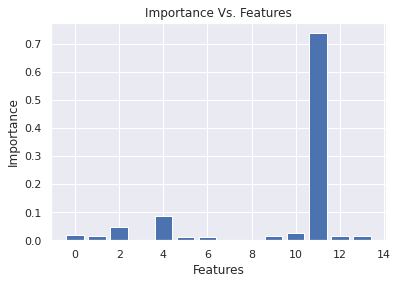


-------------------------------
Delete feature:  worst area
test accuracy:  [0.94471519 0.94968354 0.95474684 0.95224684 0.95981013 0.95727848
 0.96234177 0.96487342 0.95727848 0.95981013 0.95727848 0.95477848
 0.95477848 0.95981013 0.95477848 0.95477848 0.95224684 0.95477848
 0.95477848 0.95731013 0.95224684 0.95731013 0.94974684 0.95224684
 0.94724684 0.95227848 0.94721519 0.94974684 0.94721519 0.94974684
 0.94471519 0.94721519 0.94721519 0.94721519 0.94721519 0.94721519
 0.94721519 0.94721519 0.94221519 0.94221519 0.94221519 0.94221519
 0.93971519 0.93971519 0.93718354 0.93971519 0.93718354 0.93718354
 0.93468354 0.93718354 0.93968354 0.93718354 0.94218354 0.93968354
 0.93968354 0.93968354 0.93718354 0.93718354 0.93468354 0.93218354
 0.93468354 0.93468354 0.93468354 0.93468354 0.93218354 0.93218354
 0.93468354 0.92968354 0.93218354 0.93218354 0.93218354 0.92718354
 0.92718354 0.92468354 0.92718354 0.92718354 0.92718354 0.92718354
 0.92718354 0.92968354 0.92718354 0.93218354 0.92968

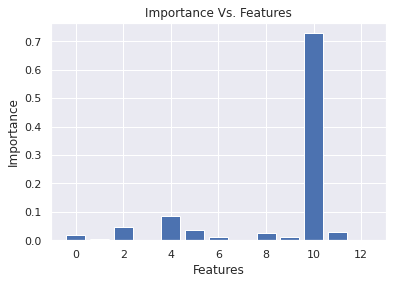


-------------------------------
Delete feature:  worst smoothness
test accuracy:  [0.94221519 0.94974684 0.95734177 0.95737342 0.96234177 0.96993671
 0.96234177 0.96234177 0.95727848 0.95727848 0.95727848 0.96234177
 0.95731013 0.95984177 0.95481013 0.95481013 0.95227848 0.95477848
 0.95227848 0.95227848 0.95227848 0.95481013 0.95481013 0.95481013
 0.95481013 0.95481013 0.95481013 0.95231013 0.95481013 0.95481013
 0.95481013 0.95481013 0.95231013 0.95231013 0.95481013 0.95481013
 0.95231013 0.95231013 0.94981013 0.94981013 0.94981013 0.94981013
 0.95231013 0.95231013 0.95231013 0.94981013 0.94477848 0.94981013
 0.94727848 0.94227848 0.94727848 0.94477848 0.94727848 0.94727848
 0.94474684 0.94474684 0.94474684 0.94727848 0.93974684 0.93974684
 0.93974684 0.93974684 0.93974684 0.93974684 0.93721519 0.93721519
 0.93721519 0.93471519 0.93471519 0.93471519 0.93471519 0.93471519
 0.93221519 0.93221519 0.92468354 0.92721519 0.92468354 0.92971519
 0.92718354 0.93218354 0.92968354 0.92968354 0

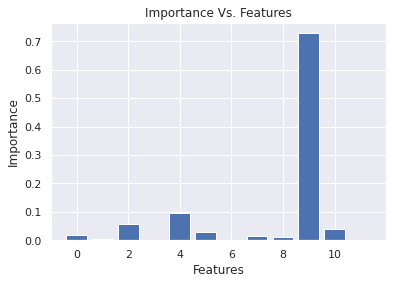


-------------------------------
Delete feature:  worst perimeter
test accuracy:  [0.94224684 0.94221519 0.95987342 0.95231013 0.95984177 0.95731013
 0.95731013 0.95981013 0.95224684 0.95474684 0.95474684 0.96234177
 0.94974684 0.95224684 0.94724684 0.94727848 0.94724684 0.95227848
 0.94724684 0.94224684 0.94474684 0.94477848 0.94727848 0.94727848
 0.94474684 0.94224684 0.94224684 0.94477848 0.94224684 0.93971519
 0.94224684 0.94224684 0.94224684 0.94477848 0.94227848 0.94227848
 0.94227848 0.94227848 0.94227848 0.94227848 0.93977848 0.93977848
 0.93724684 0.93977848 0.93724684 0.93724684 0.93724684 0.93724684
 0.93471519 0.93471519 0.93471519 0.93724684 0.93221519 0.93221519
 0.92971519 0.93221519 0.92721519 0.93221519 0.92971519 0.92971519
 0.92718354 0.92718354 0.92218354 0.92218354 0.92218354 0.92218354
 0.92218354 0.92218354 0.92218354 0.92218354 0.92218354 0.92468354
 0.92218354 0.92218354 0.91968354 0.92218354 0.91968354 0.92218354
 0.91968354 0.92218354 0.92218354 0.92218354 0.

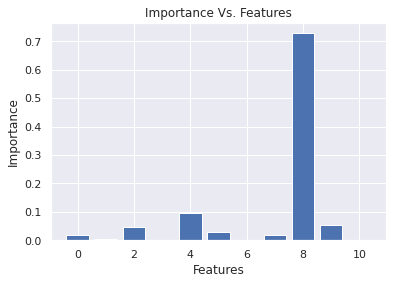


-------------------------------
Delete feature:  worst compactness
test accuracy:  [0.94981013 0.94731013 0.95734177 0.95737342 0.95477848 0.95731013
 0.95984177 0.95984177 0.95727848 0.95477848 0.95477848 0.95731013
 0.95727848 0.95984177 0.94977848 0.95227848 0.94727848 0.95227848
 0.94977848 0.95477848 0.94727848 0.94977848 0.94727848 0.94727848
 0.94477848 0.94981013 0.94727848 0.94727848 0.94727848 0.94981013
 0.94981013 0.94981013 0.94727848 0.94977848 0.94477848 0.94731013
 0.94227848 0.94477848 0.94477848 0.94727848 0.94727848 0.94977848
 0.94477848 0.94477848 0.94477848 0.94227848 0.94224684 0.94227848
 0.93974684 0.94227848 0.94224684 0.94227848 0.93724684 0.94227848
 0.93977848 0.93977848 0.93474684 0.93474684 0.93724684 0.93474684
 0.93724684 0.93724684 0.93474684 0.93724684 0.93474684 0.93474684
 0.93474684 0.93474684 0.93474684 0.93474684 0.93221519 0.93474684
 0.93221519 0.93221519 0.92971519 0.92971519 0.92971519 0.93221519
 0.92971519 0.93221519 0.92971519 0.93221519 

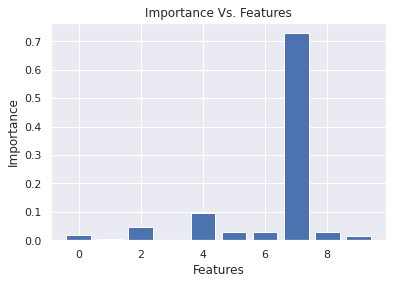


-------------------------------
Delete feature:  fractal dimension error
test accuracy:  [0.94224684 0.95234177 0.94981013 0.95984177 0.95737342 0.95734177
 0.95484177 0.95734177 0.95481013 0.95734177 0.94977848 0.95481013
 0.95227848 0.95227848 0.95481013 0.95481013 0.94727848 0.95231013
 0.94727848 0.94474684 0.94224684 0.94474684 0.94224684 0.94724684
 0.94474684 0.94727848 0.94474684 0.94981013 0.94981013 0.94981013
 0.94981013 0.94727848 0.94474684 0.94474684 0.93974684 0.94977848
 0.93974684 0.94727848 0.94224684 0.94224684 0.93974684 0.93974684
 0.94224684 0.94224684 0.94227848 0.94227848 0.94227848 0.94227848
 0.94224684 0.94227848 0.93974684 0.94227848 0.93974684 0.94227848
 0.93724684 0.93724684 0.93474684 0.93474684 0.93474684 0.93474684
 0.93474684 0.93474684 0.93474684 0.93724684 0.93474684 0.93724684
 0.93974684 0.93974684 0.93221519 0.93221519 0.92971519 0.92971519
 0.92971519 0.92971519 0.92971519 0.92971519 0.92971519 0.92971519
 0.92971519 0.92971519 0.92721519 0.929

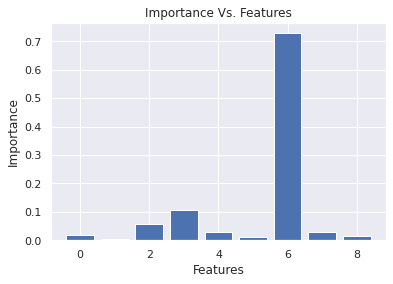


-------------------------------
Delete feature:  radius error
test accuracy:  [0.95227848 0.95227848 0.95484177 0.95977848 0.95477848 0.95727848
 0.95231013 0.95984177 0.95487342 0.95734177 0.95737342 0.95484177
 0.94977848 0.94977848 0.94981013 0.95234177 0.94731013 0.94731013
 0.94477848 0.94727848 0.94727848 0.94981013 0.94727848 0.94981013
 0.94727848 0.94477848 0.94477848 0.94727848 0.94724684 0.94727848
 0.94727848 0.94474684 0.94471519 0.94724684 0.94724684 0.94724684
 0.94474684 0.94474684 0.93971519 0.94224684 0.93971519 0.94224684
 0.94221519 0.94474684 0.94477848 0.94224684 0.93974684 0.94227848
 0.93974684 0.93974684 0.94227848 0.94227848 0.94227848 0.94227848
 0.94227848 0.94227848 0.94227848 0.94227848 0.94227848 0.94227848
 0.93974684 0.93974684 0.93974684 0.93974684 0.93974684 0.93974684
 0.93974684 0.93974684 0.93974684 0.93974684 0.93724684 0.93724684
 0.93724684 0.93724684 0.93724684 0.93977848 0.93724684 0.93974684
 0.93974684 0.93974684 0.93974684 0.93974684 0.934

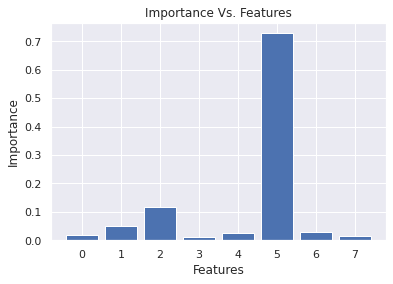


-------------------------------
Delete feature:  worst texture
test accuracy:  [0.91189873 0.91699367 0.93218354 0.93221519 0.92962025 0.9371519
 0.93974684 0.94474684 0.94224684 0.94731013 0.94984177 0.95231013
 0.94981013 0.95234177 0.95231013 0.95231013 0.94981013 0.95481013
 0.94981013 0.94731013 0.93974684 0.94477848 0.94224684 0.94224684
 0.94224684 0.94474684 0.93971519 0.94221519 0.93718354 0.93971519
 0.93971519 0.93971519 0.93974684 0.94224684 0.93724684 0.94224684
 0.93471519 0.93471519 0.93218354 0.93471519 0.93218354 0.93218354
 0.93468354 0.93468354 0.93468354 0.93218354 0.93468354 0.93468354
 0.9321519  0.9321519  0.9321519  0.9321519  0.9321519  0.9321519
 0.9321519  0.9321519  0.9321519  0.9321519  0.9321519  0.9321519
 0.9296519  0.9296519  0.9296519  0.93218354 0.93218354 0.93218354
 0.93218354 0.93218354 0.93218354 0.93218354 0.93218354 0.93218354
 0.93218354 0.93218354 0.93218354 0.93218354 0.93218354 0.93218354
 0.93218354 0.93218354 0.9271519  0.9271519  0.92715

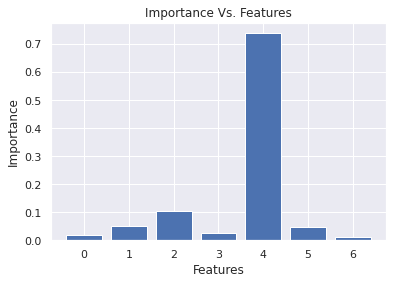


-------------------------------
Delete feature:  worst fractal dimension
test accuracy:  [0.93212025 0.93202532 0.93212025 0.93712025 0.94974684 0.94977848
 0.93718354 0.94221519 0.94474684 0.94224684 0.94474684 0.94224684
 0.93721519 0.94224684 0.95231013 0.94981013 0.94977848 0.95481013
 0.95481013 0.95484177 0.95481013 0.95481013 0.95481013 0.95481013
 0.94724684 0.94981013 0.94977848 0.95231013 0.94981013 0.94981013
 0.94474684 0.94727848 0.94474684 0.94474684 0.93721519 0.94221519
 0.93971519 0.94474684 0.94221519 0.94727848 0.93721519 0.94477848
 0.93974684 0.93974684 0.93974684 0.93974684 0.93974684 0.93974684
 0.93974684 0.94227848 0.93974684 0.94227848 0.93974684 0.94227848
 0.94227848 0.94227848 0.93468354 0.93721519 0.93468354 0.93718354
 0.93468354 0.93718354 0.93718354 0.93718354 0.93718354 0.93971519
 0.93721519 0.93971519 0.93971519 0.93971519 0.93718354 0.93718354
 0.93718354 0.93718354 0.93718354 0.93718354 0.92968354 0.93468354
 0.93218354 0.93218354 0.92968354 0.932

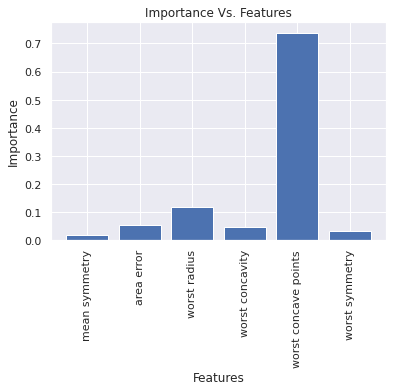


-------------------------------
Delete feature:  mean symmetry
test accuracy:  [0.94218354 0.92952532 0.94721519 0.9396519  0.94721519 0.94721519
 0.94471519 0.95227848 0.94977848 0.94974684 0.95227848 0.95477848
 0.95731013 0.94974684 0.95227848 0.95477848 0.95731013 0.95984177
 0.95484177 0.95231013 0.95231013 0.95231013 0.95234177 0.95737342
 0.95484177 0.95734177 0.95481013 0.95987342 0.95731013 0.95984177
 0.95481013 0.95984177 0.95731013 0.95731013 0.94981013 0.95231013
 0.94981013 0.95234177 0.94477848 0.94981013 0.94474684 0.94474684
 0.94474684 0.94474684 0.94224684 0.94224684 0.94224684 0.94474684
 0.94224684 0.94224684 0.94224684 0.94224684 0.93974684 0.93974684
 0.93974684 0.93974684 0.93974684 0.94224684 0.93974684 0.93974684
 0.93974684 0.93974684 0.93721519 0.93721519 0.93721519 0.93971519
 0.93721519 0.93721519 0.93721519 0.93971519 0.93468354 0.93718354
 0.93718354 0.93718354 0.93718354 0.93718354 0.93718354 0.93971519
 0.93468354 0.93718354 0.93468354 0.93468354 0.93

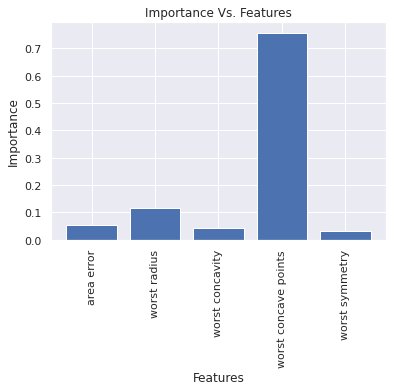


-------------------------------
Delete feature:  worst symmetry
test accuracy:  [0.94474684 0.92705696 0.93968354 0.9346519  0.94224684 0.94471519
 0.94471519 0.94974684 0.94221519 0.94724684 0.94474684 0.93721519
 0.94474684 0.94477848 0.94981013 0.94981013 0.95484177 0.95234177
 0.94984177 0.94731013 0.94984177 0.94984177 0.95737342 0.95740506
 0.95737342 0.95487342 0.95487342 0.95487342 0.95737342 0.95737342
 0.95737342 0.95737342 0.95987342 0.95987342 0.95481013 0.95481013
 0.95481013 0.95734177 0.95231013 0.95481013 0.95231013 0.95481013
 0.94981013 0.94981013 0.94731013 0.94731013 0.94981013 0.95234177
 0.95234177 0.95234177 0.95234177 0.95234177 0.95234177 0.95234177
 0.94984177 0.94734177 0.94731013 0.94984177 0.94481013 0.94734177
 0.94481013 0.94481013 0.94481013 0.94481013 0.94231013 0.94231013
 0.93977848 0.94231013 0.93977848 0.93977848 0.93724684 0.93724684
 0.93724684 0.93474684 0.93471519 0.93471519 0.93471519 0.93471519
 0.93471519 0.93724684 0.93218354 0.93471519 0.9

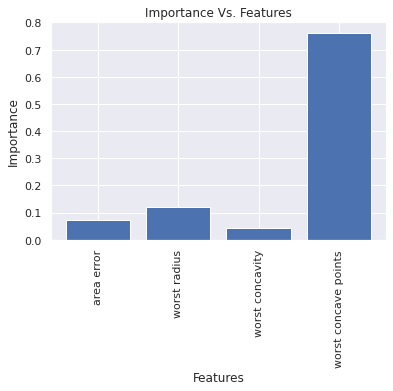


-------------------------------
Delete feature:  worst concavity
test accuracy:  [0.93468354 0.91458861 0.95224684 0.95474684 0.95974684 0.95724684
 0.95477848 0.95474684 0.94721519 0.94974684 0.94468354 0.94974684
 0.94721519 0.94974684 0.93968354 0.94221519 0.94721519 0.94471519
 0.94971519 0.94971519 0.95224684 0.94721519 0.94471519 0.94218354
 0.93718354 0.93718354 0.94221519 0.93971519 0.94221519 0.94221519
 0.94221519 0.94221519 0.94471519 0.94721519 0.94471519 0.94721519
 0.94721519 0.94721519 0.94721519 0.94721519 0.94471519 0.94721519
 0.94721519 0.94471519 0.94721519 0.94471519 0.94471519 0.94471519
 0.94974684 0.95224684 0.94974684 0.94974684 0.94724684 0.94974684
 0.94727848 0.94727848 0.94727848 0.94977848 0.94727848 0.94727848
 0.94474684 0.94724684 0.94474684 0.94724684 0.94724684 0.94724684
 0.94474684 0.94724684 0.94474684 0.94724684 0.94727848 0.94727848
 0.94727848 0.94474684 0.94474684 0.94474684 0.94727848 0.94977848
 0.94727848 0.94977848 0.94727848 0.94727848 0.

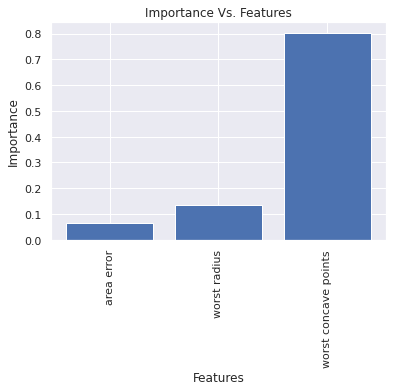


-------------------------------
Delete feature:  area error
test accuracy:  [0.90446203 0.89436709 0.91193038 0.93208861 0.93705696 0.94712025
 0.93955696 0.93958861 0.93708861 0.93212025 0.9321519  0.93468354
 0.93712025 0.9371519  0.93968354 0.94471519 0.93971519 0.93724684
 0.93974684 0.92968354 0.93468354 0.9296519  0.93721519 0.93468354
 0.9346519  0.9346519  0.9346519  0.9346519  0.9346519  0.9346519
 0.93718354 0.93721519 0.93721519 0.94221519 0.93971519 0.93971519
 0.93971519 0.94221519 0.94224684 0.94224684 0.94224684 0.93971519
 0.94224684 0.94224684 0.94224684 0.94224684 0.94224684 0.93971519
 0.94224684 0.94224684 0.94224684 0.94224684 0.94224684 0.94224684
 0.93974684 0.93974684 0.93974684 0.93974684 0.93721519 0.93721519
 0.93721519 0.93721519 0.93721519 0.93721519 0.93721519 0.93721519
 0.93721519 0.93721519 0.93721519 0.93721519 0.93971519 0.93971519
 0.94471519 0.94471519 0.94471519 0.94471519 0.94471519 0.94221519
 0.94471519 0.94724684 0.94471519 0.94471519 0.942183

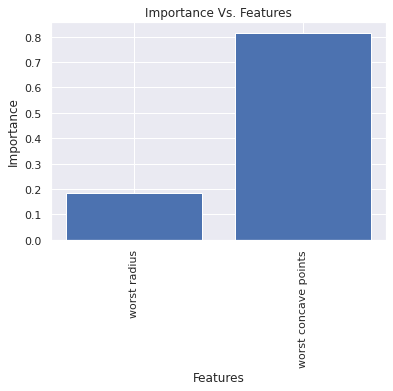


-------------------------------
Delete feature:  worst radius
test accuracy:  [0.88443038 0.86683544 0.88689873 0.88436709 0.89443038 0.88939873
 0.90702532 0.89193038 0.90193038 0.89689873 0.90702532 0.89949367
 0.91199367 0.91202532 0.91452532 0.91705696 0.91955696 0.91455696
 0.91955696 0.91955696 0.91955696 0.91958861 0.92208861 0.92208861
 0.92208861 0.92208861 0.91708861 0.92208861 0.92208861 0.92208861
 0.91958861 0.92208861 0.92208861 0.92462025 0.92208861 0.92208861
 0.92458861 0.91702532 0.91955696 0.91702532 0.91955696 0.91955696
 0.91955696 0.91955696 0.91955696 0.91702532 0.91702532 0.91702532
 0.91702532 0.91702532 0.91702532 0.91702532 0.91955696 0.91702532
 0.91955696 0.91955696 0.91955696 0.91955696 0.91955696 0.91955696
 0.91702532 0.91955696 0.91702532 0.91955696 0.91955696 0.91955696
 0.91955696 0.91955696 0.91955696 0.91955696 0.91955696 0.91955696
 0.91955696 0.91955696 0.91702532 0.91702532 0.91702532 0.91702532
 0.91702532 0.91702532 0.91702532 0.91702532 0.919

In [ ]:
### YOUR CODE HERE ###
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
print(X_train)
s_X_train = scaler.transform(X_train)
print('\n-------------------------\n')
print(s_X_train)
s_removed_features, s_accuracy = Feature_selector(s_X_train,Y_train)


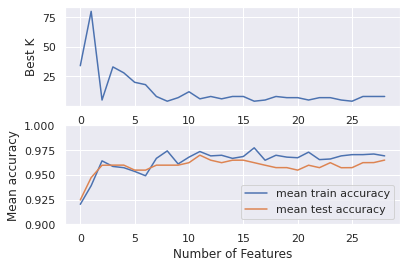

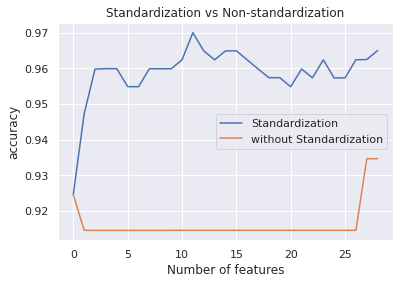

In [ ]:
s_axis = range(0,len(s_accuracy))
s_k,s_train_acc,s_test_acc = [],[],[]
for ix in range(len(s_accuracy)):
  s_k.append(s_accuracy[len(s_accuracy)-ix-1][1])
  s_train_acc.append(s_accuracy[len(s_accuracy)-ix-1][2])
  s_test_acc.append(s_accuracy[len(s_accuracy)-ix-1][3])
s_fig,s_axs = plt.subplots(2)
s_axs[0].plot(s_axis,s_k)
s_axs[0].set_xlabel('Number of Features')
s_axs[0].set_ylabel('Best K')
s_axs[1].plot(s_axis,s_train_acc,label='mean train accuracy')
s_axs[1].plot(s_axis,s_test_acc,label = 'mean test accuracy')
s_axs[1].legend()
s_axs[1].set_ylim([0.9,1])
s_axs[1].set_xlabel('Number of Features')
s_axs[1].set_ylabel('Mean accuracy')
plt.show()
plt.plot(s_axis,s_test_acc,label='Standardization')
plt.plot(s_axis, test_acc,label='without Standardization')
plt.xlabel("Number of features")
plt.ylabel("accuracy")
plt.title("Standardization vs Non-standardization")
plt.legend()

In [ ]:
best_accuracy = max(s_test_acc)
index = s_test_acc.index(best_accuracy)
best_k = s_k[index]
print('best test accuracy is',best_accuracy)
print('with number of features:',index+1) #index + 1 because the function did not include the accuracy for the very last feature ('worst concave point').
print('at k =', best_k)

best test accuracy is 0.9699367088607594
with number of features: 12
at k = 6


**Answer for Part 4.3:**

1. The above figure shows the dataset after standardization has obvious imporvement to the model (around 5% accuracy improvement).  
2. The best cross validation accuracy for standardized data is when number of feature is 6 and k equals 8. As mentioned before, many features are not contributed much to the model such as 'mean radius'. Therefore, the model does not require many features to be trained on; meanwhile, K=8 is a reasonable as discussed in Part 2 where a large value of K will result underfitting or overfitting on the contrary.

## Part 5: Decision Tree Classifier [1.5 Mark]

Train a decision tree classifier on the standardized dataset (read the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) and check the example there.) Tune the `max_depth` and `min_samples_split` parameters of the tree using cross-validation (CV).
 * Compare the decision tree's performance (mean CV score) with KNN, both using all the features. 


In [ ]:
  knn = neighbors.KNeighborsClassifier(n_neighbors=ix)
  score = cross_validate(knn,X_train, Y_train, cv=5, return_train_score = True)
  accuracy_train.append(score['train_score'].mean())
  accuracy_test.append(score['test_score'].mean())

In the previous section, we figure out when K=10, knn will provide the best result.

In [ ]:
max_D = np.arange(1,101,1)
min_samples_split = np.arange(2,50,1)
score_dic = {}
for depth in max_D:
  score_dic[depth]=[]
  for split in min_samples_split:
    DTC = tree.DecisionTreeClassifier(max_depth = depth, min_samples_split=split)
    dt = DTC.fit(s_X_train,Y_train)
    score_tempt = cross_validate(dt,s_X_train, Y_train, cv=5, return_train_score = True)
    temp = score_tempt['test_score'].mean()
    score_dic[depth].append(temp)

Best accuracy at max depth: 83
Best accuracy at minimum split:  2


Text(0, 0.5, 'cross-validation score')

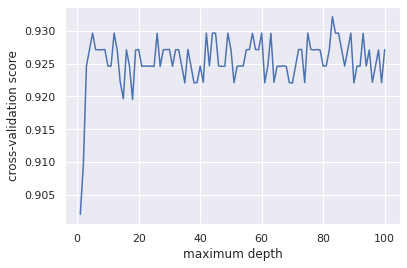

In [ ]:
g_max = score_dic[2][3]
y_axis = []

for ix in score_dic:
  #print(ix)
  local_max = max(score_dic[ix])
  y_axis.append(local_max)
  #print(local_max)
  local_index = score_dic[ix].index(local_max)
  #print(local_index)
  if(local_max>g_max):
    g_split = min_samples_split[local_index]
    g_max = local_max
    g_depth = ix

print('Best accuracy at max depth:',g_depth)
print('Best accuracy at minimum split: ',g_split)
plt.plot(max_D, y_axis)
plt.xlabel('maximum depth')
plt.ylabel('cross-validation score')


In [ ]:
DTC2 = tree.DecisionTreeClassifier(max_depth = g_depth, min_samples_split = g_split)
#DTC = tree.DecisionTreeClassifier() #default setting
dtt = DTC2.fit(s_X_train,Y_train)
score_dt = cross_validate(dtt,s_X_train, Y_train, cv=5)

knn = neighbors.KNeighborsClassifier(n_neighbors=10)
dt2 = knn.fit(s_X_train,Y_train)
score_knn = cross_validate(dt2, s_X_train, Y_train, cv=5)
print("result:")
print('----------------')
print("Score with ALL Feature DTC")
print('with tuned max_depth:',g_depth,'min_sample_split:',g_split)
print(score_dt['test_score'].mean())
print("----------------\n")

print('----------------')
print("Score with ALL Feature KNN")
print("with tuned k = ",10)
print(score_knn['test_score'].mean())
print("----------------")

result:
----------------
Score with ALL Feature DTC
with tuned max_depth: 83 min_sample_split: 2
0.9195569620253166
----------------

----------------
Score with ALL Feature KNN
with tuned k =  10
0.9674367088607594
----------------


**Answer for Part 5***

KNN with all features have a better cross-validation score than Decision Tree method

## Part 6: Test Data [0.5 Mark]

Now that you've created several models, pick your best one (highest CV accuracy) and apply it to the test dataset you had initially set aside. Discuss your results.

As shown in the plot in Part 4, the 6 most important features are: 'area error', 'worst texture', 'worst area', 'worst concavity', 'worst concave points', and 'worst symmetry'.

Where best neighbour value K is 10 as discussed in the part 2.

Hence, I will fit the model with only these features.

In [ ]:
DF = pd.DataFrame(data = X_test, columns = dataset.feature_names)
Selected_features = ['area error', 'worst texture', 'worst area', 'worst concavity', 'worst concave points', 'worst symmetry']
DFF = DF[Selected_features]

In [ ]:
import timeit
knn_test = neighbors.KNeighborsClassifier(n_neighbors=10)
scaler = preprocessing.StandardScaler().fit(DFF)
s_X_test = scaler.transform(DFF)
start_time = timeit.default_timer()
score_knn = cross_validate(knn_test, s_X_test, Y_test, cv=5)
end_time = timeit.default_timer()
print('runtime: ',end_time-start_time)
print('KNN mean cross-validation accuracy with 6 features and k=10: ',score_knn['test_score'].mean())

runtime:  0.027383388999851377
KNN mean cross-validation accuracy with 6 features and k=10:  0.9352941176470588


In [ ]:
knn_test2 = neighbors.KNeighborsClassifier(n_neighbors=10)
scaler2 = preprocessing.StandardScaler().fit(X_test)
s_X_test2 = scaler2.transform(X_test)
start_time = timeit.default_timer()
score_knn2 = cross_validate(knn_test2,s_X_test2,Y_test, cv=5)
end_time = timeit.default_timer()
print('runtime: ',end_time-start_time)
print('KNN mean cross-validation accuracy with ALL features and k=10: ',score_knn2['test_score'].mean())


runtime:  0.02500085500014393
KNN mean cross-validation accuracy with ALL features and k=10:  0.9413445378151261


**Answer for Part 6:**

For this part, I first computed the result with most 6 importance features (found in Part 4) and compare the result with Full feature model. Both have similar result 93.5% for 6 features and 94.1% for all features. 

In general, full feature model will outperform the limited feature model at the cost of extra runtime and possible overfitting. 

References:

https://towardsdatascience.com/decision-trees-in-machine-learning-641b9c4e8052

https://www.analyticsvidhya.com/blog/2021/02/machine-learning-101-decision-tree-algorithm-for-classification/